# Churn Prediction
# Group Name:         
1) Elbetel Shineda <br>
2) Leul Mintesinot <br>
3) Mikiyas Bedasa <br>
4) Mihret Agegnehu <br>
5) Natanim Ashenafi <br>

In [33]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score, recall_score,f1_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Load the Dataset

In [2]:
data = pd.read_excel('Customer-Churn.xlsx')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1520,6184-DYUOB,Female,0,Yes,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.60,55.25,No
5733,4817-KEQSP,Female,0,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1326.35,No
4961,6954-OOYZZ,Male,0,Yes,No,18,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.35,768.05,No
5783,1415-YFWLT,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.30,89.30,Yes
4985,4827-DPADN,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),83.30,6042.70,No


# 2. Understand the Data

In [3]:
#Get a summary of our data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Get a statistical summary of the numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
#Check for missing data in the data frame
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#Note that TotalCharges column has 11 null values
#Lets perform imputation using median
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_total_charges, inplace=True)
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
data['gender'] = data['gender'].map({'Female':0, 'Male': 1})
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
442,0206-TBWLC,0,0,Yes,No,54,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,114.65,6049.50,No
876,0207-MDKNV,0,0,No,No,15,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,105.10,1582.75,Yes
2644,2011-TRQYE,1,0,No,No,18,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),33.50,600.00,Yes
5707,4537-DKTAL,0,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.55,84.40,No
1500,7041-TXQJH,0,0,No,No,37,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.20,1478.85,No


In [9]:
data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1806,8966-KZXXA,1,0,1,Yes,36,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.10,930.95,No
4372,4781-ZXYGU,1,0,1,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.15,20.15,No
6009,6646-VRFOL,1,1,1,No,53,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.85,5485.50,Yes
4665,3884-UEBXB,0,0,1,Yes,67,No,No phone service,DSL,Yes,...,No,No,No,No,Two year,No,Bank transfer (automatic),36.15,2434.45,No
3184,5197-LQXXH,0,0,1,No,71,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),83.30,5894.50,No


In [11]:
data['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2795,0709-TVGUR,0,1,0,0,9,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.55,622.90,Yes
1311,3941-XTSKM,1,0,1,1,42,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),45.10,2049.05,No
4329,2979-SXESE,0,0,1,1,17,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,No,Electronic check,94.40,1607.20,Yes
2374,9101-NTIXF,1,0,0,0,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,50.60,No
767,7817-OMJNA,1,0,0,0,14,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.40,275.70,No


In [13]:
data['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3739,5789-LDFXO,1,0,0,0,24,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.60,592.65,No
1641,5980-BDHPY,1,0,1,0,72,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),87.10,6230.10,No
6449,7601-WFVZV,1,0,0,0,1,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
6611,8690-UPCZI,1,0,1,1,29,1,Yes,DSL,Yes,...,No,Yes,Yes,No,One year,No,Bank transfer (automatic),69.05,1958.45,No
3559,5171-EPLKN,1,0,0,0,27,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.85,470.00,No


In [15]:
#Determine categoriacal and numeric data before Univariate Analysis
for column in data.columns:
  unique_values = data[column].unique()
  length = len(unique_values)
  print(f"Unique values in '{column}' column: {unique_values} size: {length}")

Unique values in 'customerID' column: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] size: 7043
Unique values in 'gender' column: [0 1] size: 2
Unique values in 'SeniorCitizen' column: [0 1] size: 2
Unique values in 'Partner' column: [1 0] size: 2
Unique values in 'Dependents' column: [0 1] size: 2
Unique values in 'tenure' column: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] size: 73
Unique values in 'PhoneService' column: [0 1] size: 2
Unique values in 'MultipleLines' column: ['No phone service' 'No' 'Yes'] size: 3
Unique values in 'InternetService' column: ['DSL' 'Fiber optic' 'No'] size: 3
Unique values in 'OnlineSecurity' column: ['No' 'Yes' 'No internet service'] size: 3
Unique values in 'OnlineBackup' column: ['Yes' 'No' 'No internet service'] size: 3
Unique values 

In [16]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5548,4589-IUAJB,1,0,1,0,70,1,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.25,1724.15,0
3684,2842-BCQGE,1,0,0,0,43,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,0
1849,0621-TWIEM,1,0,0,0,10,1,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,45.55,402.60,1
6011,5917-HBSDW,0,0,1,1,37,1,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.35,683.75,0
4741,6583-KQJLK,0,1,1,0,15,1,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,1285.05,0


In [17]:
#Drop customer ID column as it is not needed for analysis
data = data.iloc[:,1:]
#Check that the column has been dropped
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1504,0,0,0,0,18,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.10,1247.75,0
913,1,0,0,0,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,267.00,0
1016,1,0,1,0,71,1,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,80.10,5585.40,0
3071,1,0,1,1,47,1,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.50,4318.35,0
822,1,0,0,0,47,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.10,4889.30,0


# 3. Univariate Analysis

In [18]:
#Plot histograms for univariate analysis of each numerical feature
def plot_histogram(df, column, bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#Plot bar charts for univariate analysis of each categorical feature
def plot_bar_chart(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, hue=column, palette='viridis', dodge=False)
    plt.legend([],[], frameon=False)  # Disable the legend
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


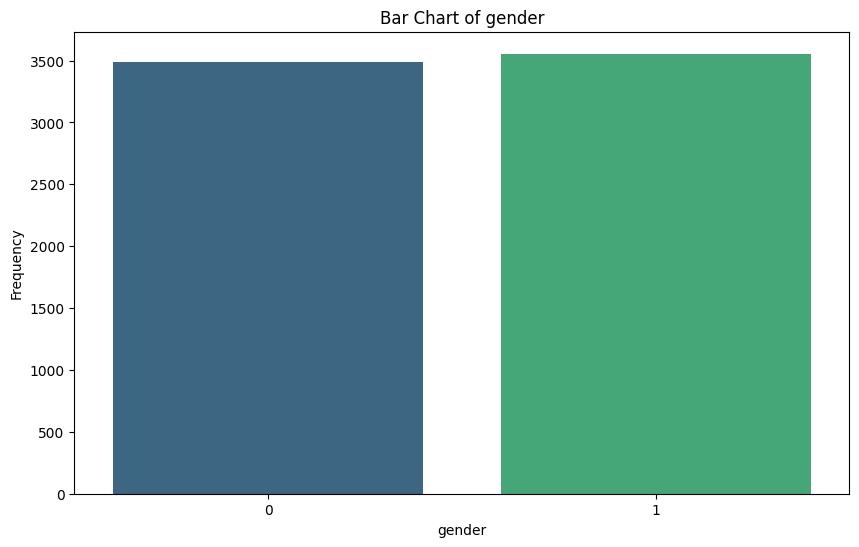

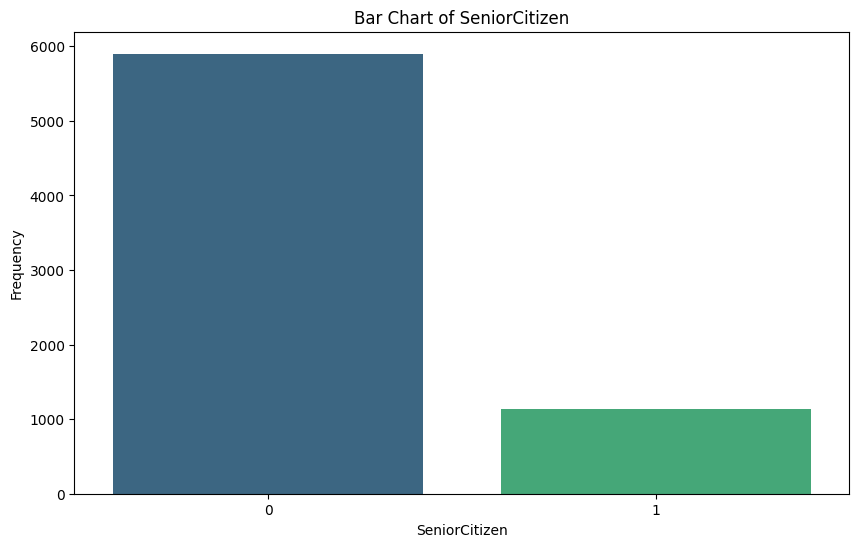

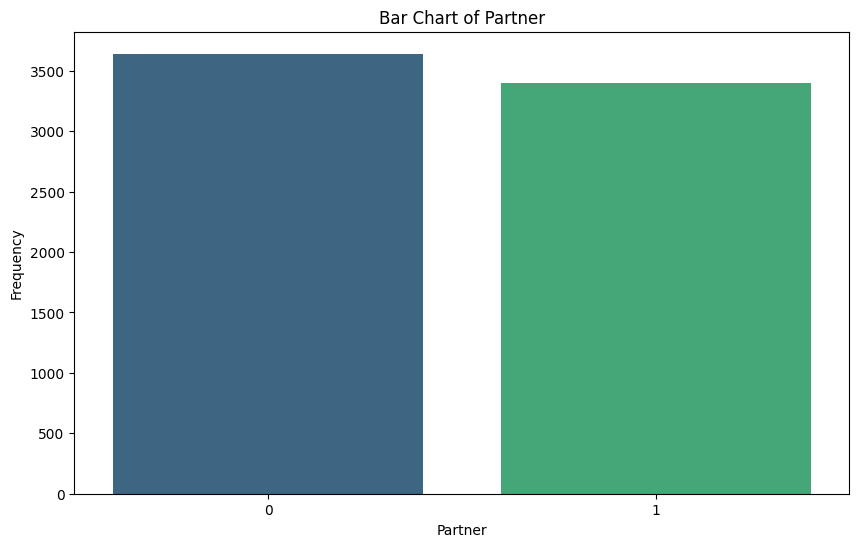

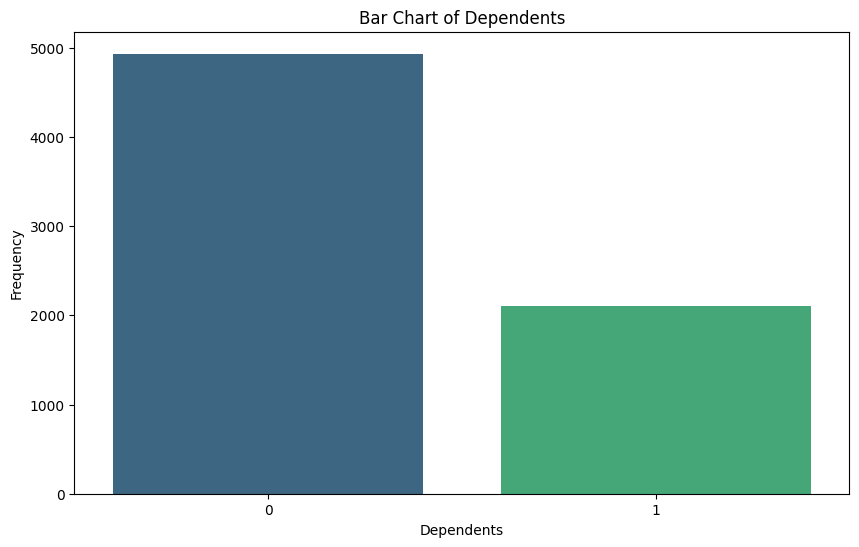

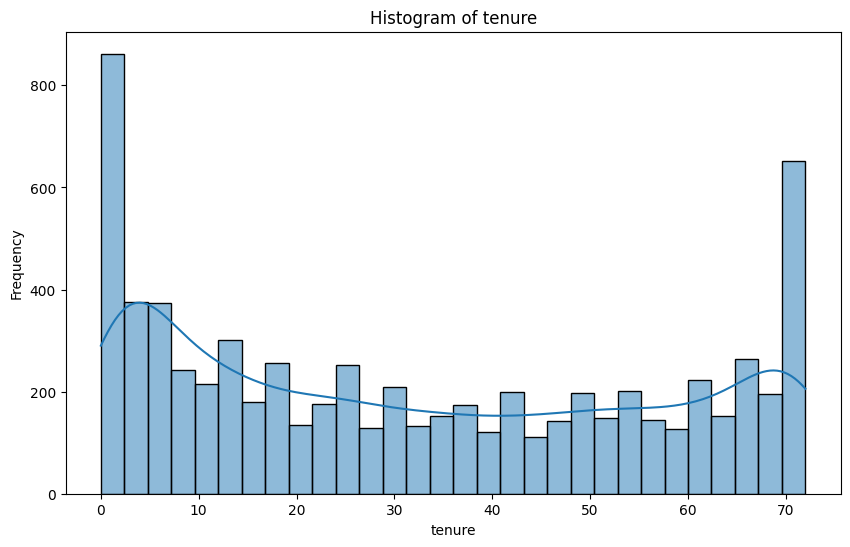

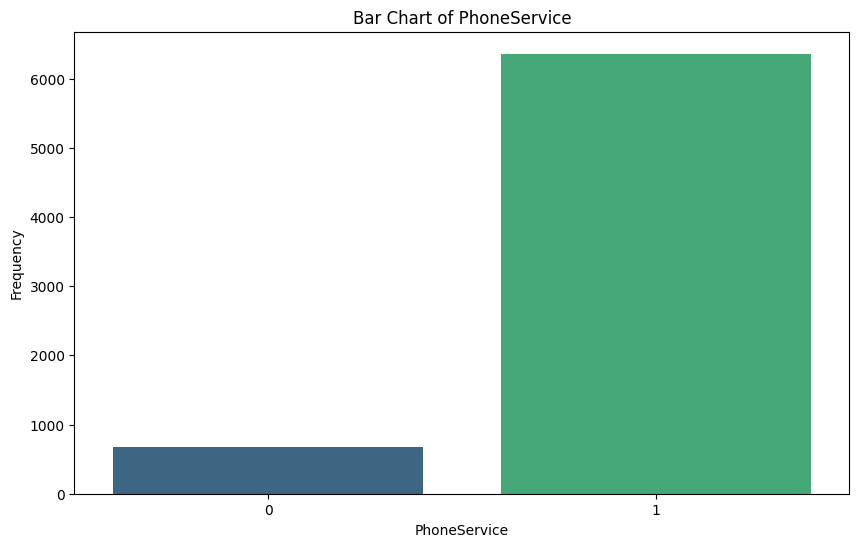

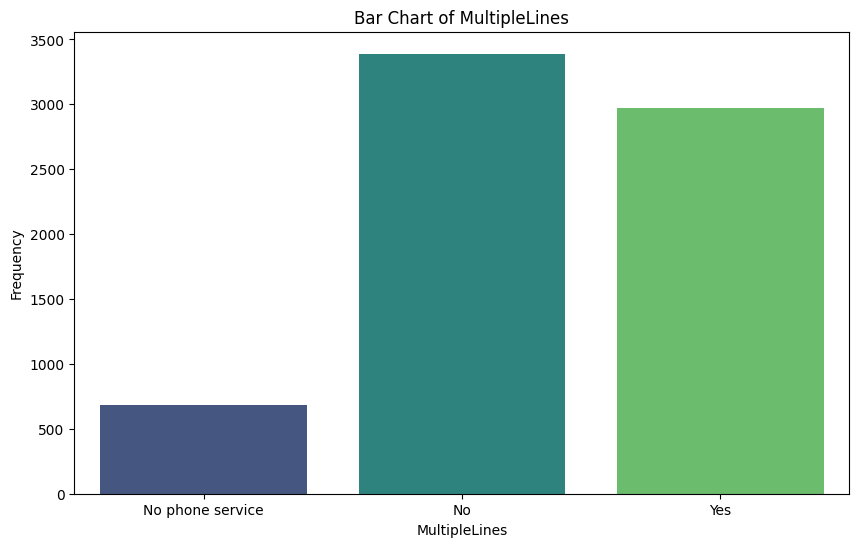

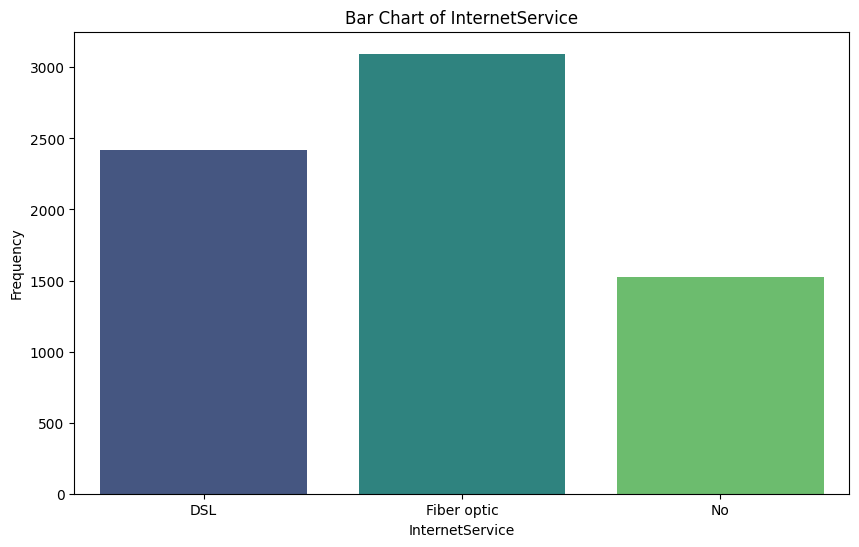

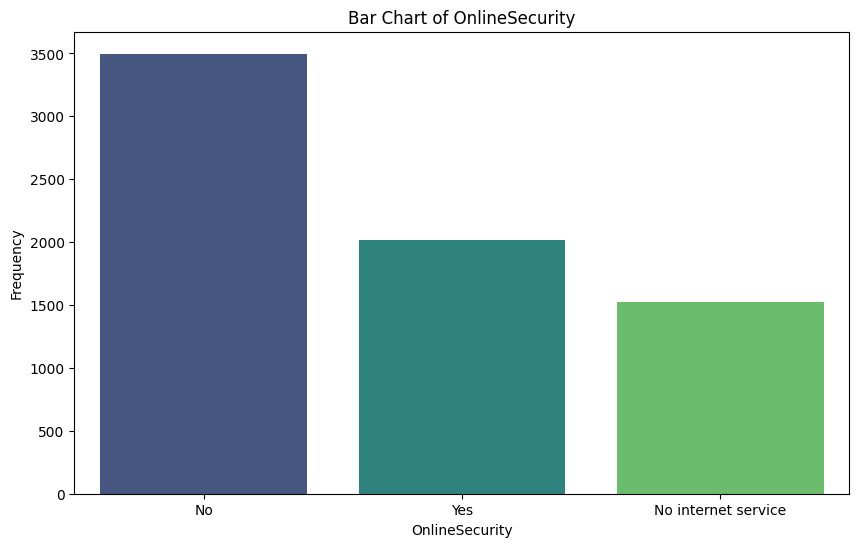

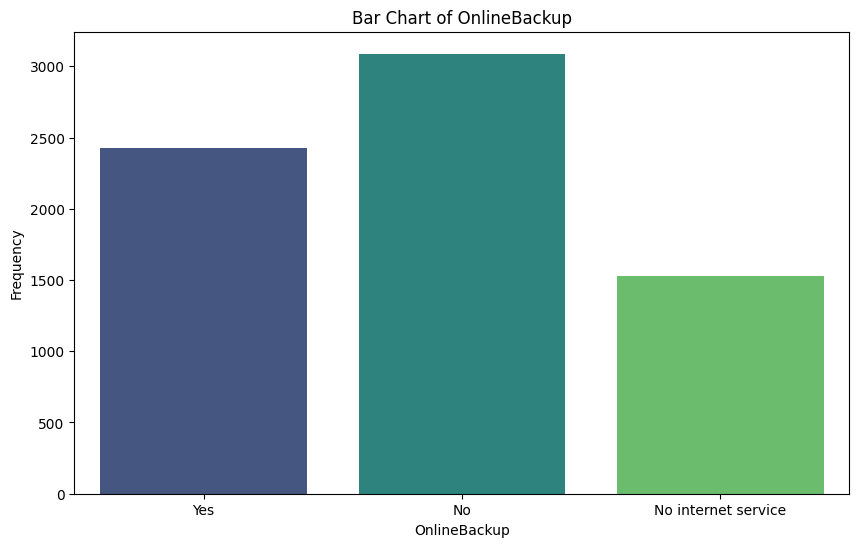

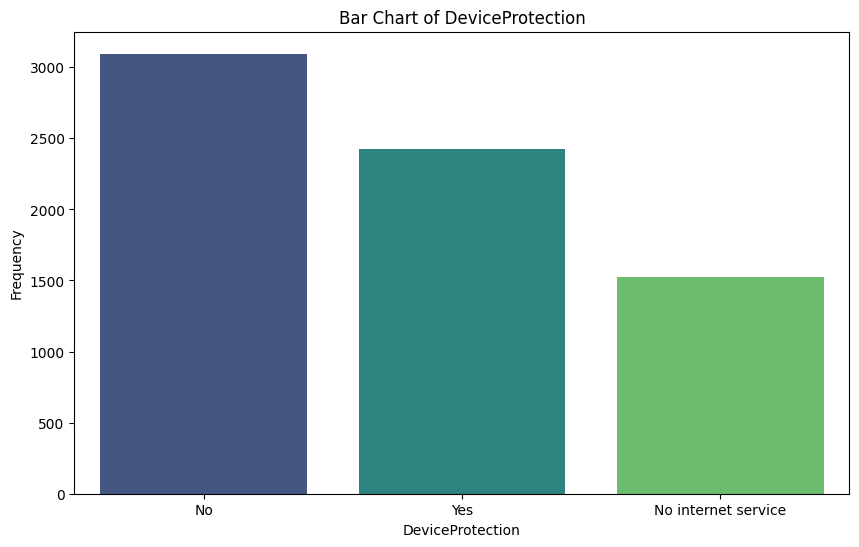

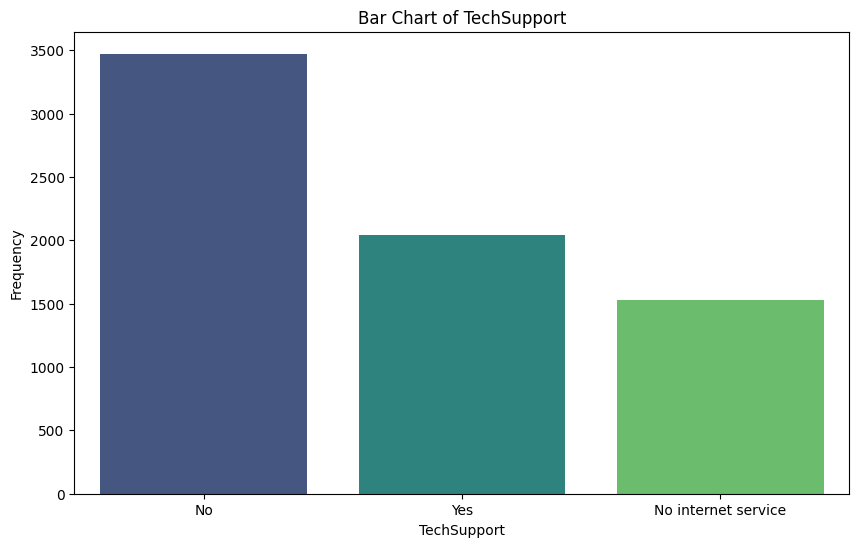

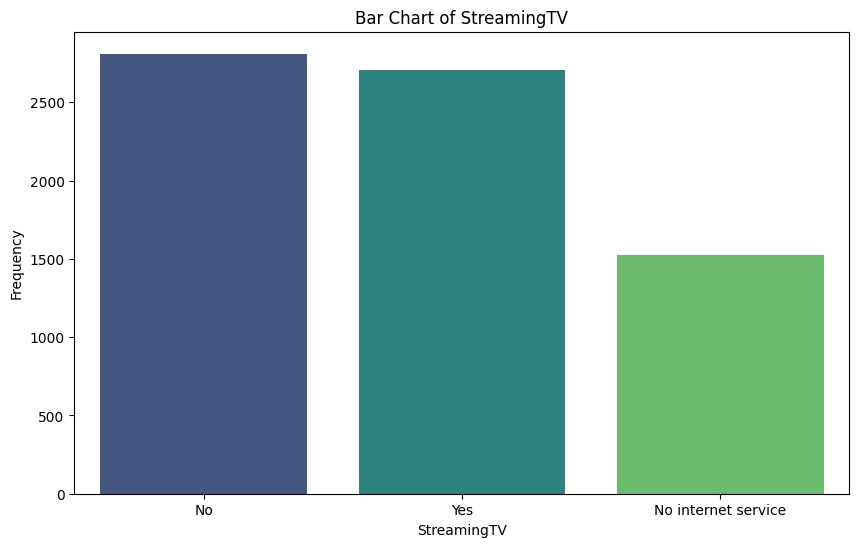

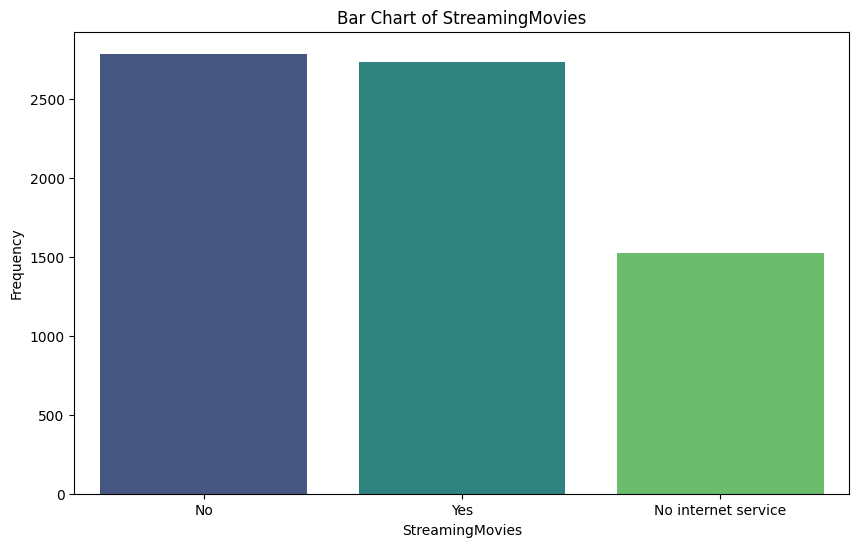

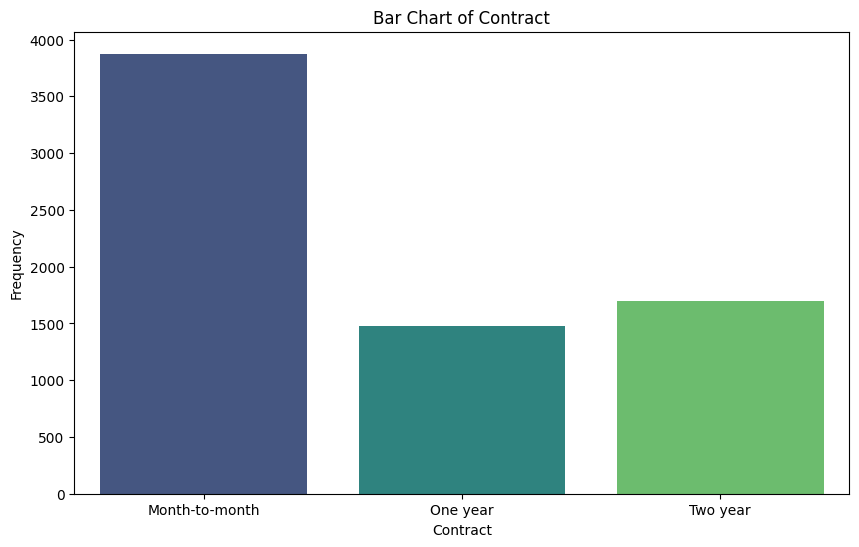

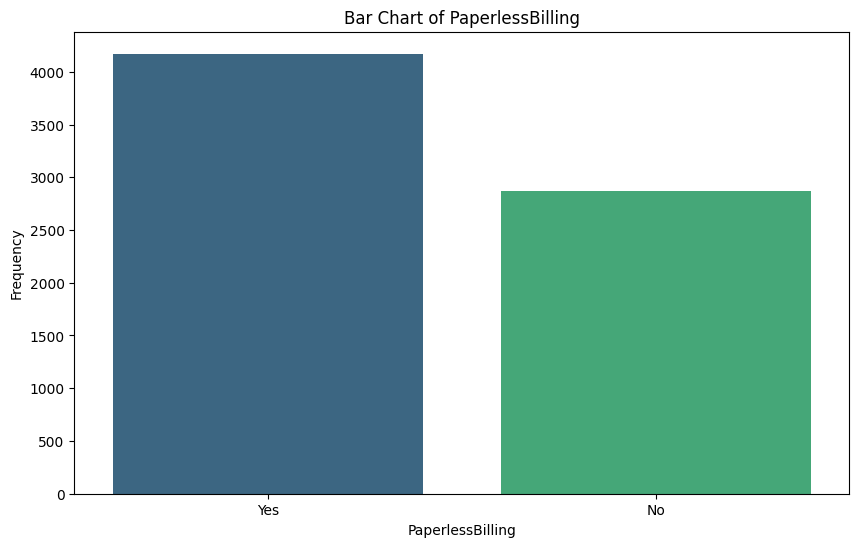

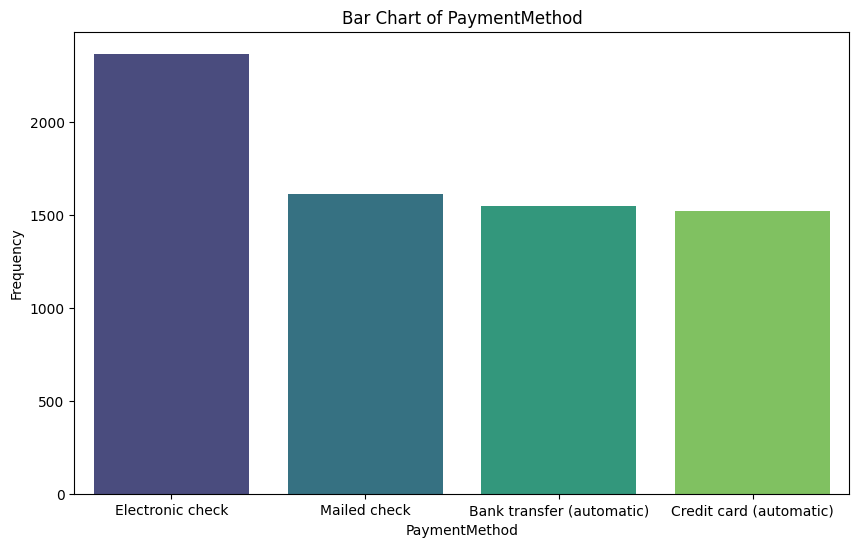

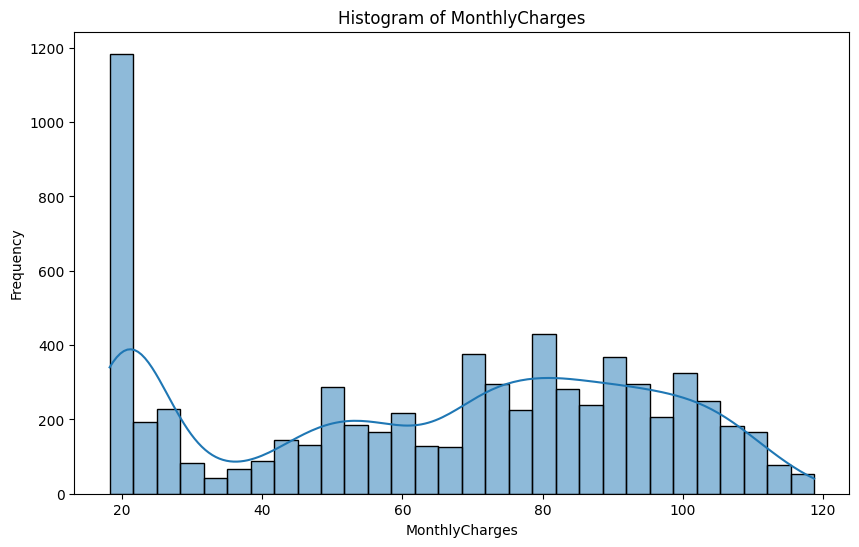

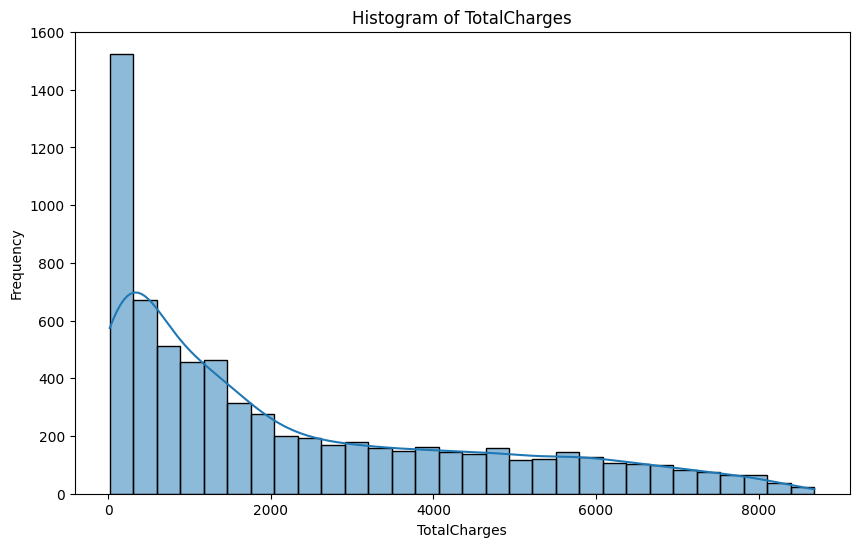

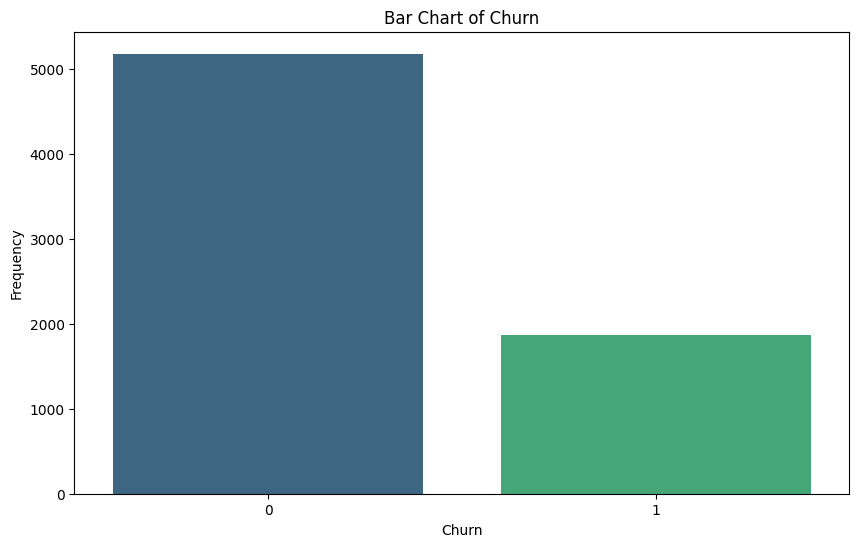

In [19]:
for column in data.columns:
  unique_values = data[column].unique()
  length = len(unique_values)
  if length > 4:
    plot_histogram(data, column)
  else:
    plot_bar_chart(data, column)

# Biavariate Analysis

In [20]:
#Analyze the relationship between each feature and the target variable - Churn

def plot_box_violin(df, column, target, plot_type='box'):
    plt.figure(figsize=(10, 6))
    if plot_type == 'box':
        sns.boxplot(x=target, y=column, data=df)
        plt.title(f'Box Plot of {column} by {target}')
    elif plot_type == 'violin':
        sns.violinplot(x=target, y=column, data=df)
        plt.title(f'Violin Plot of {column} by {target}')
    plt.xlabel(target)
    plt.ylabel(column)
    plt.show()

def plot_count_stacked_bar(df, column, target):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue=target, data=df, palette='viridis')
    plt.title(f'Count Plot of {column} by {target}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

def plot_stacked_bar_chart(df, column, target):
    crosstab = pd.crosstab(df[column], df[target])
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Stacked Bar Chart of {column} by {target}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


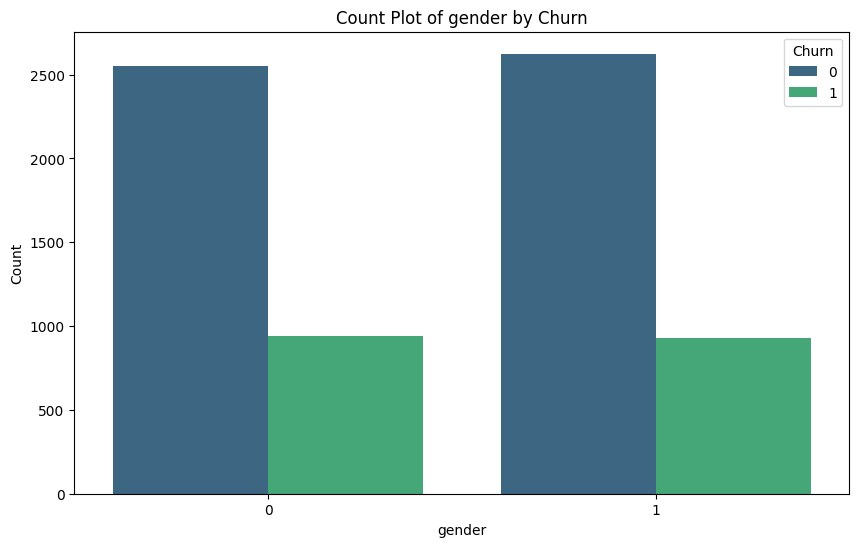

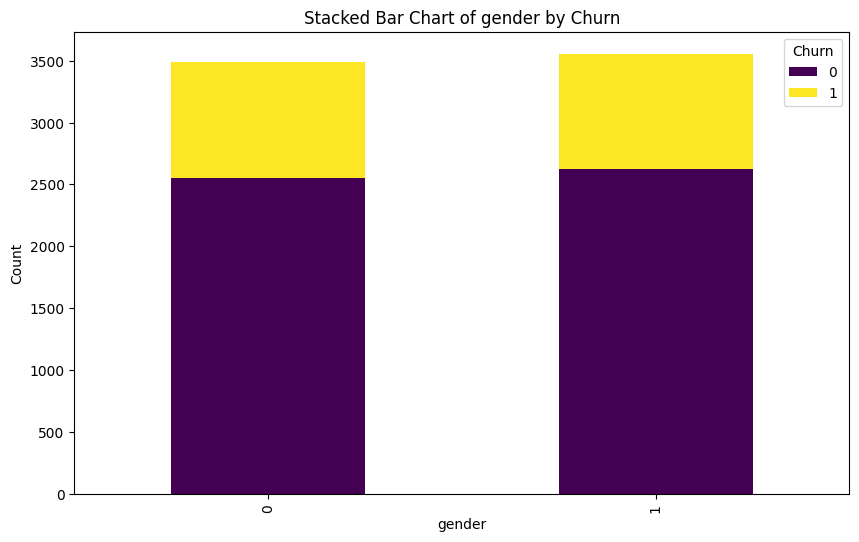

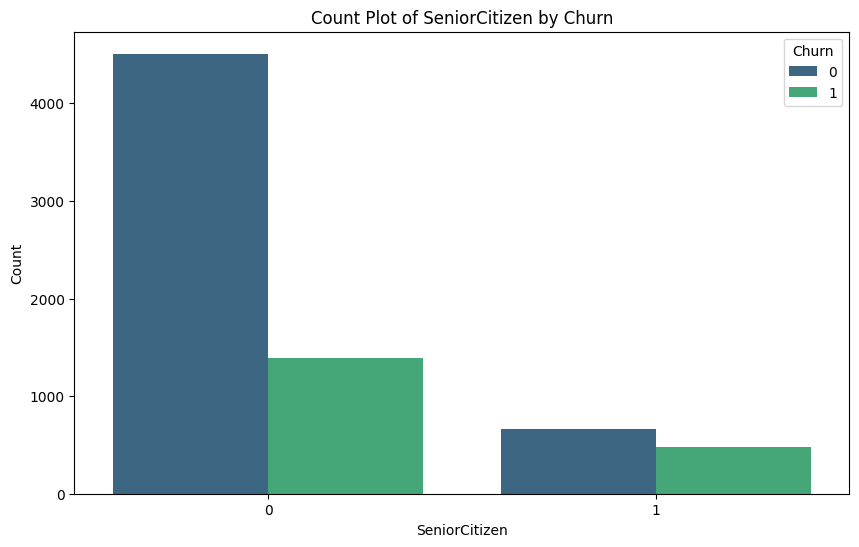

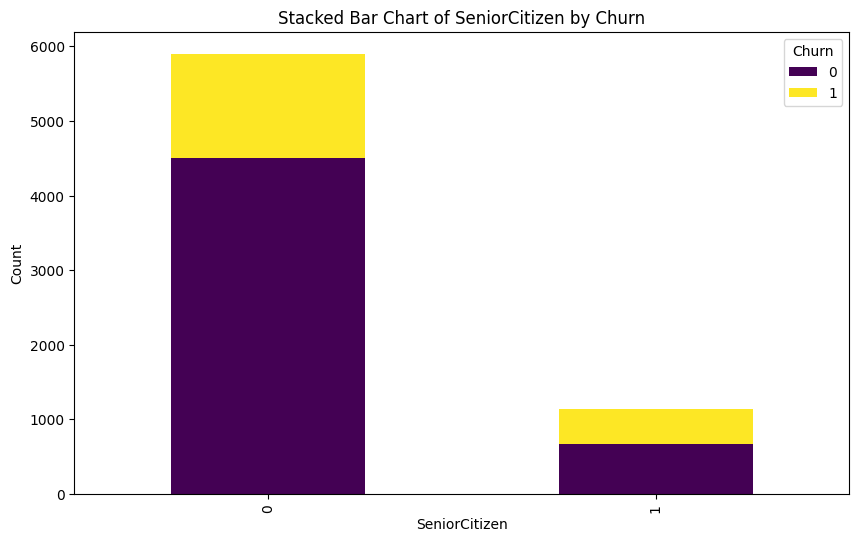

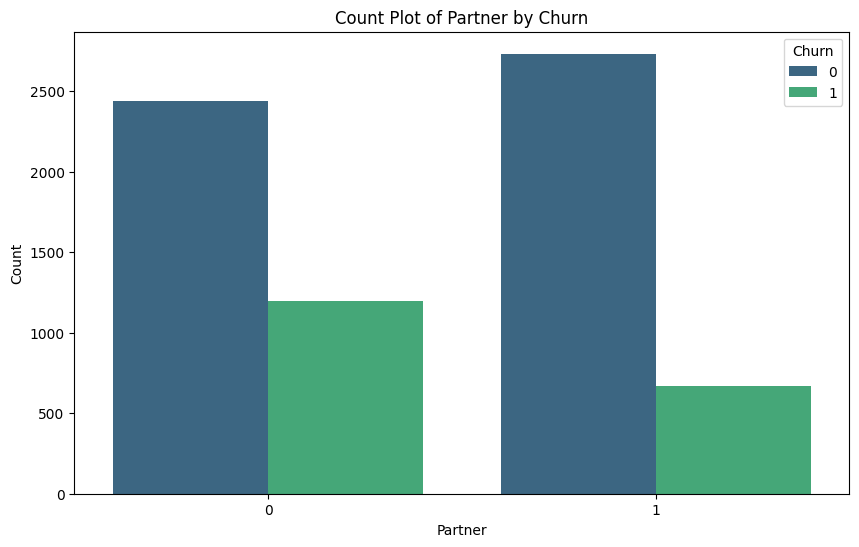

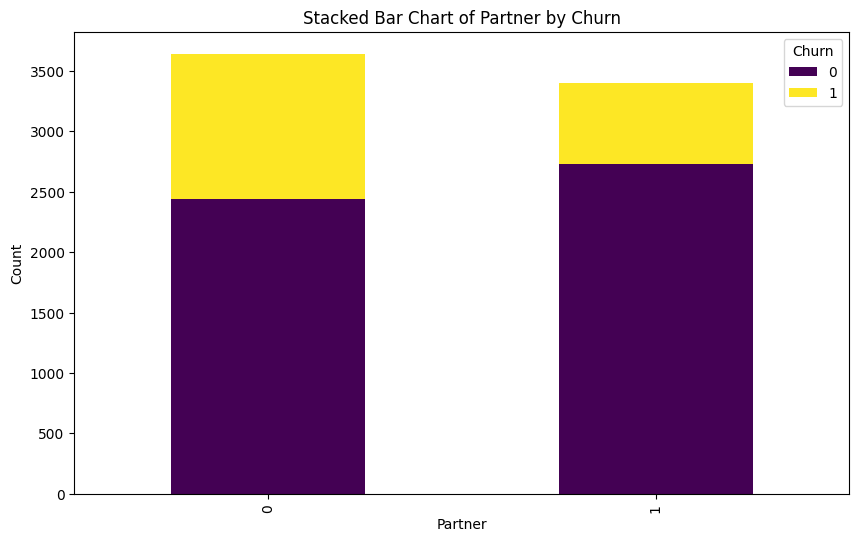

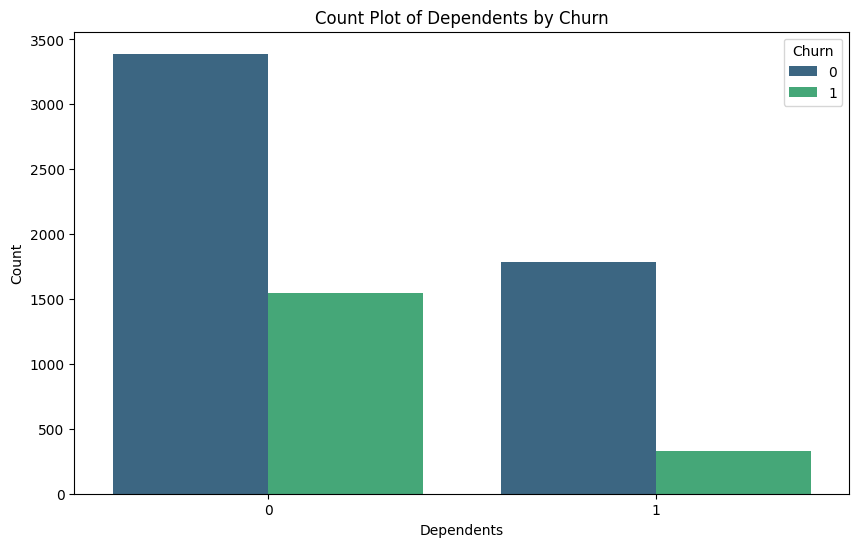

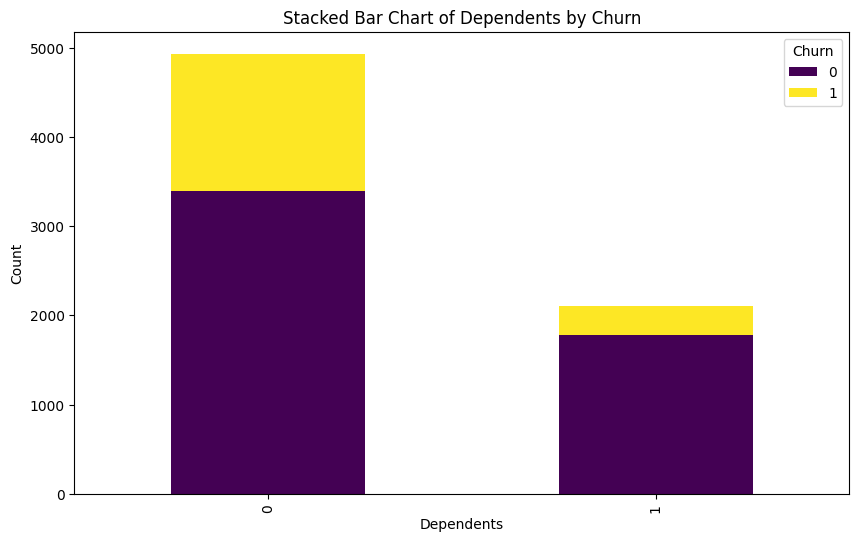

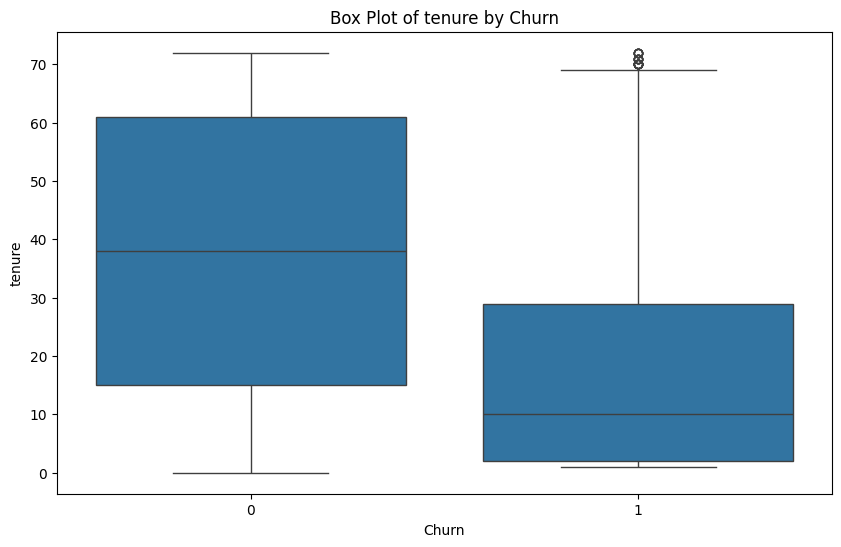

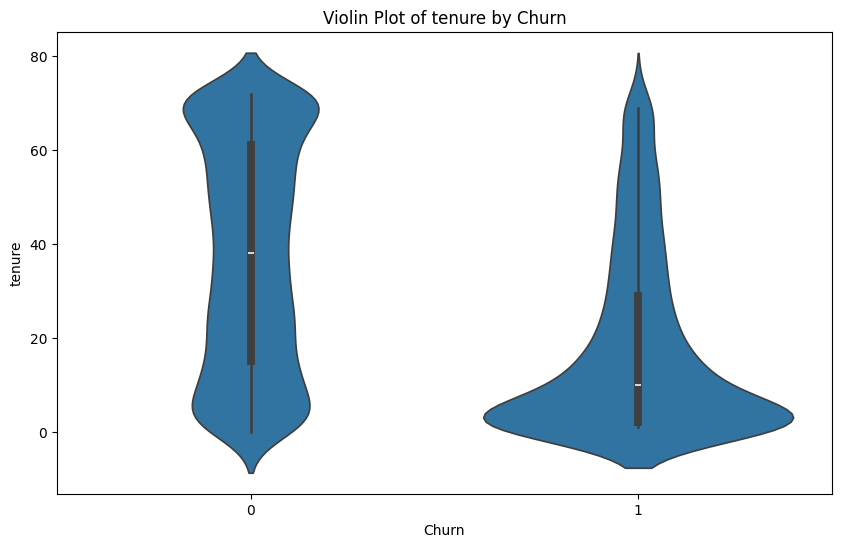

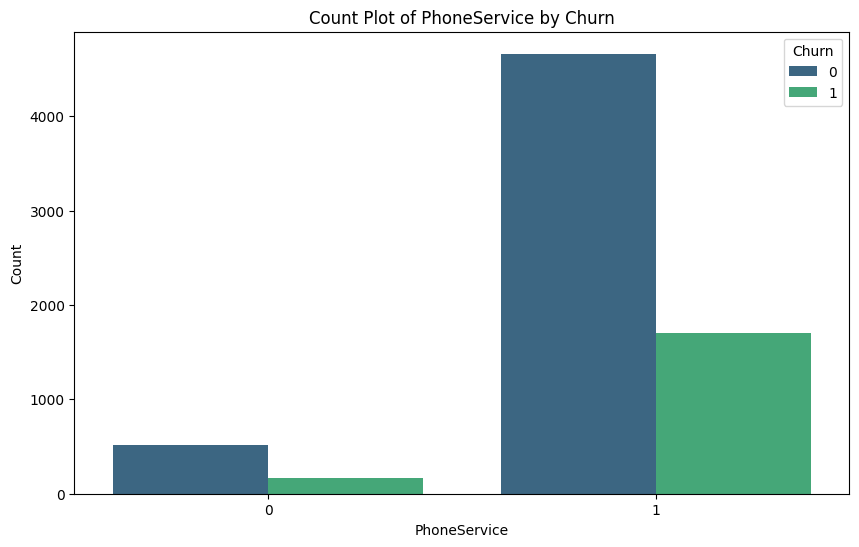

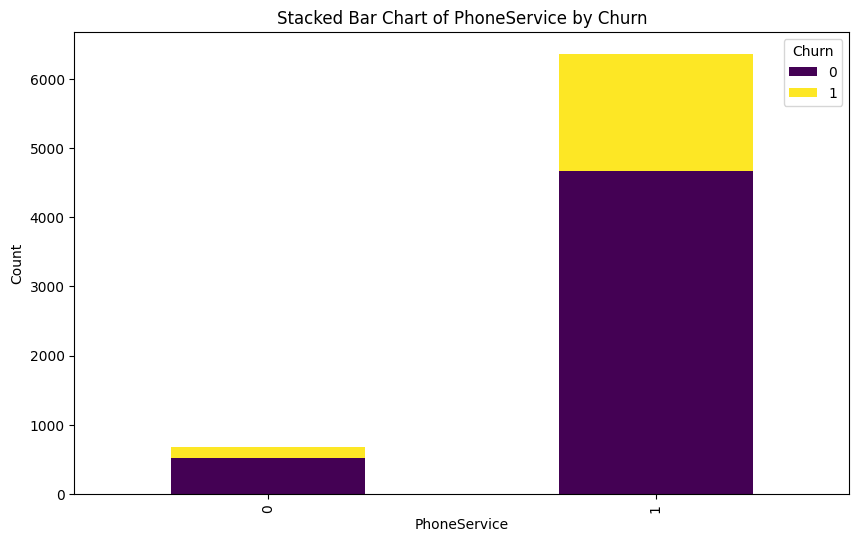

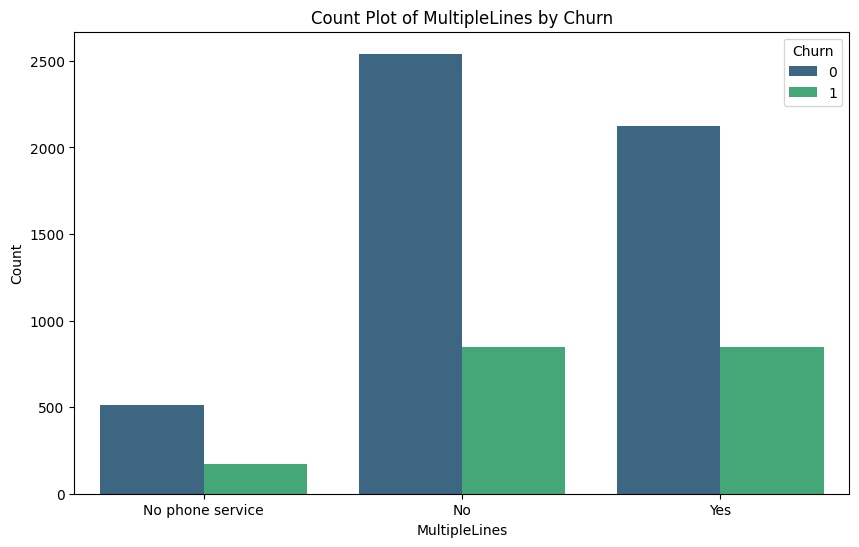

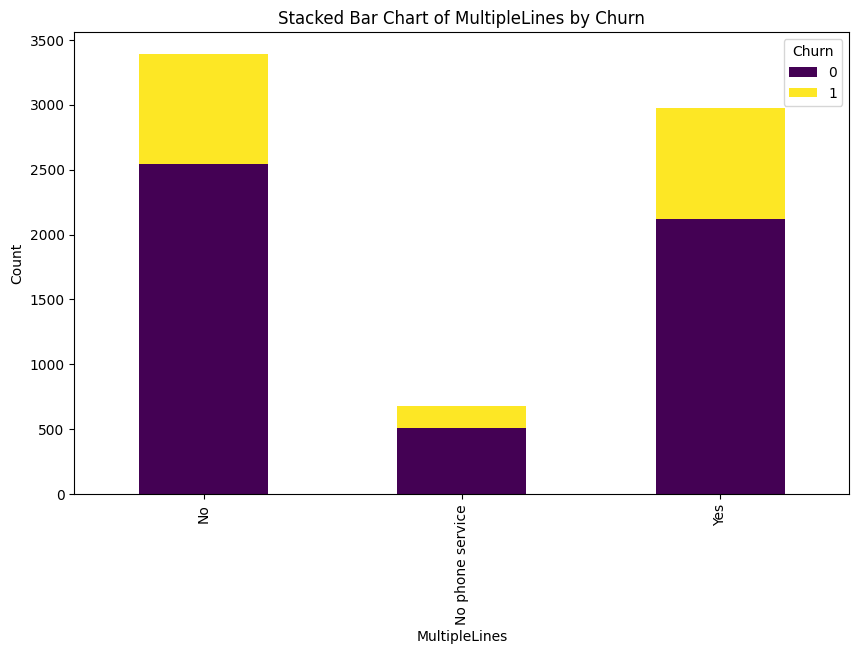

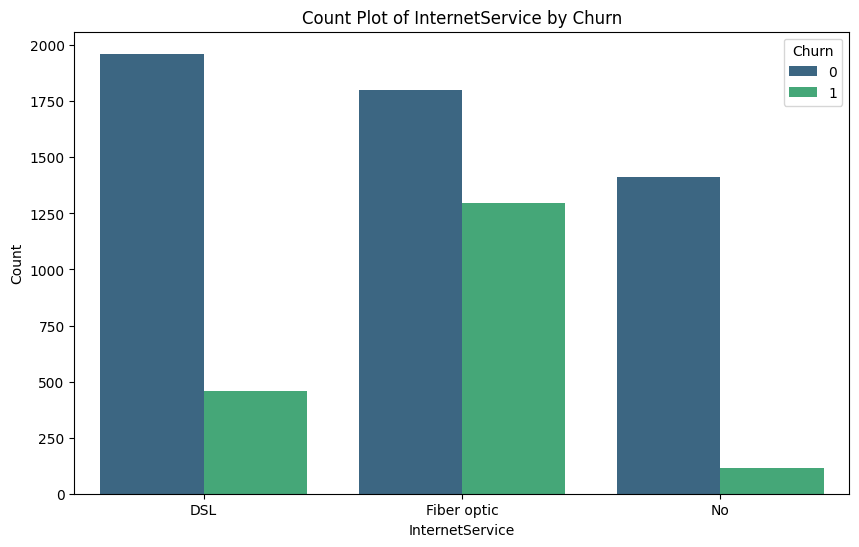

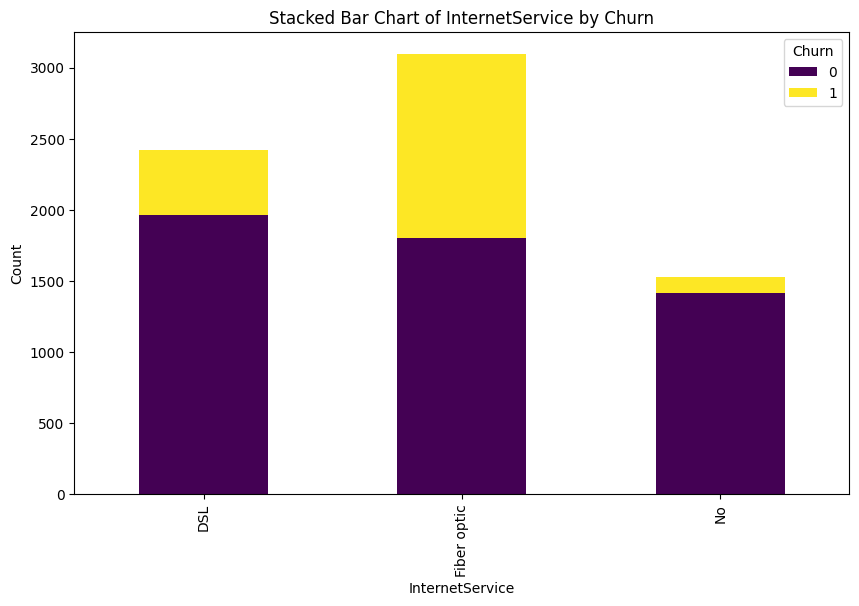

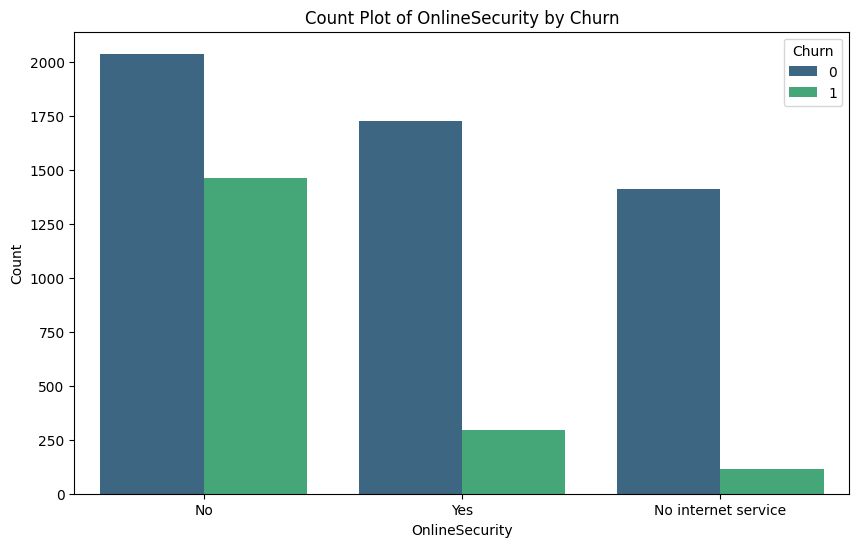

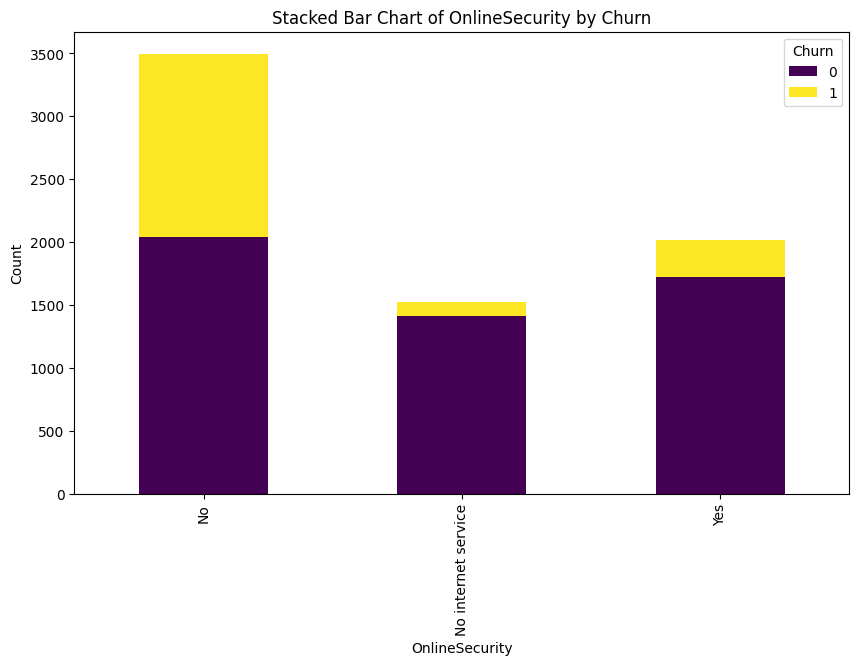

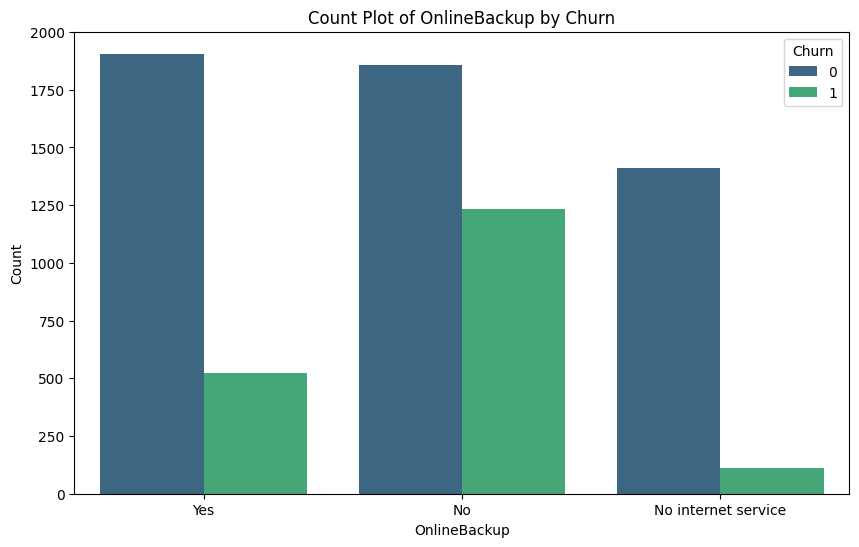

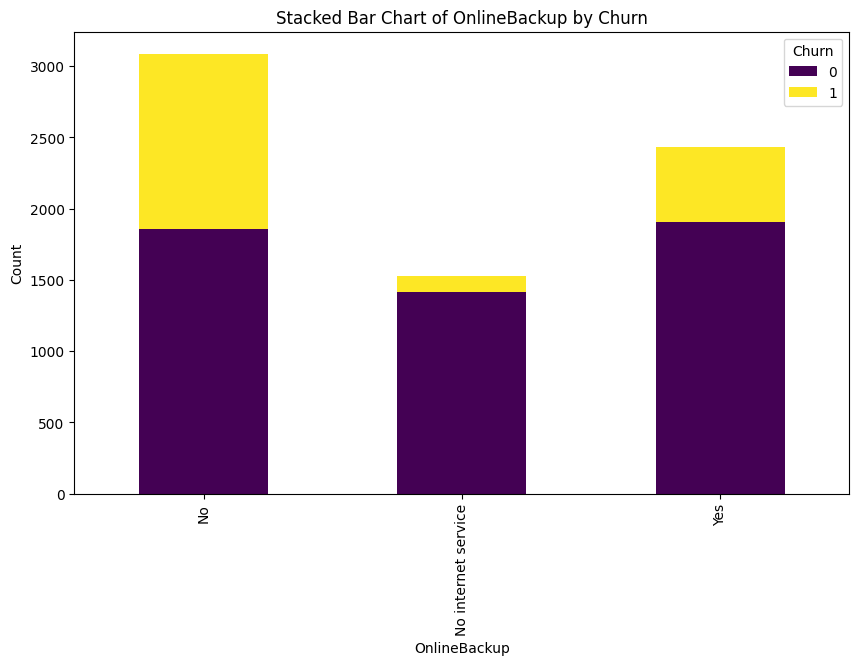

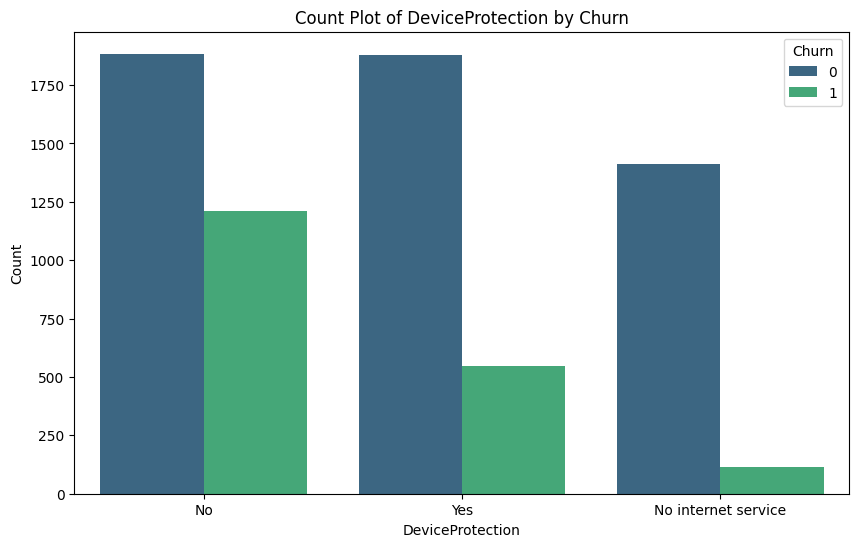

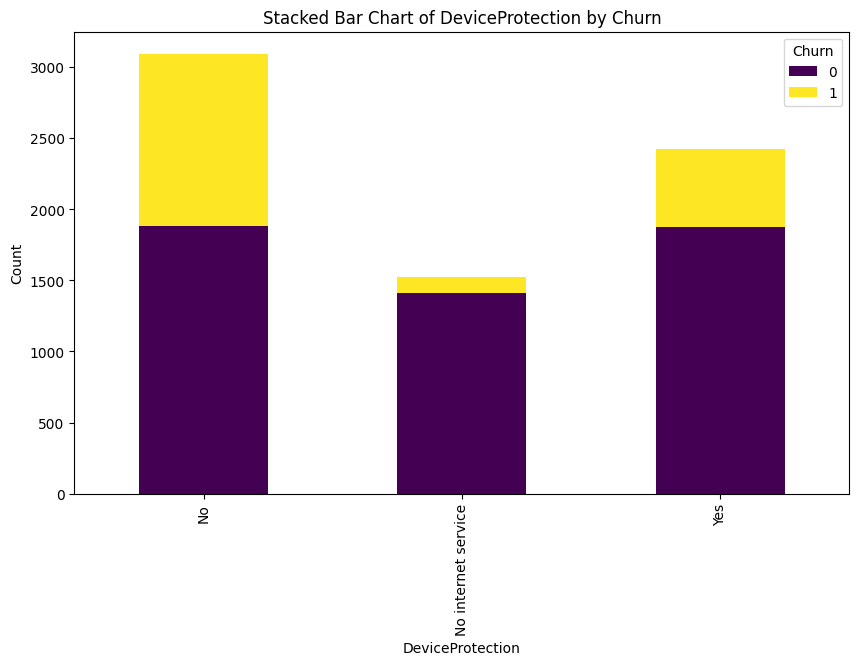

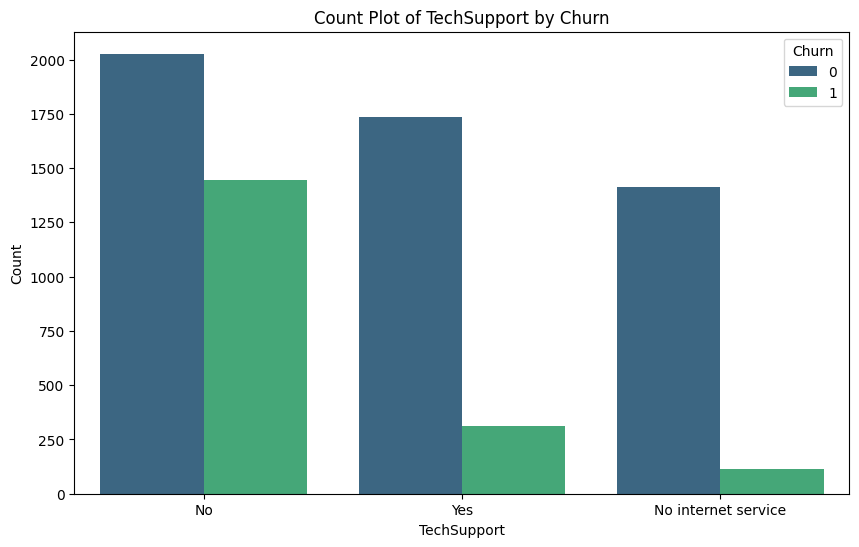

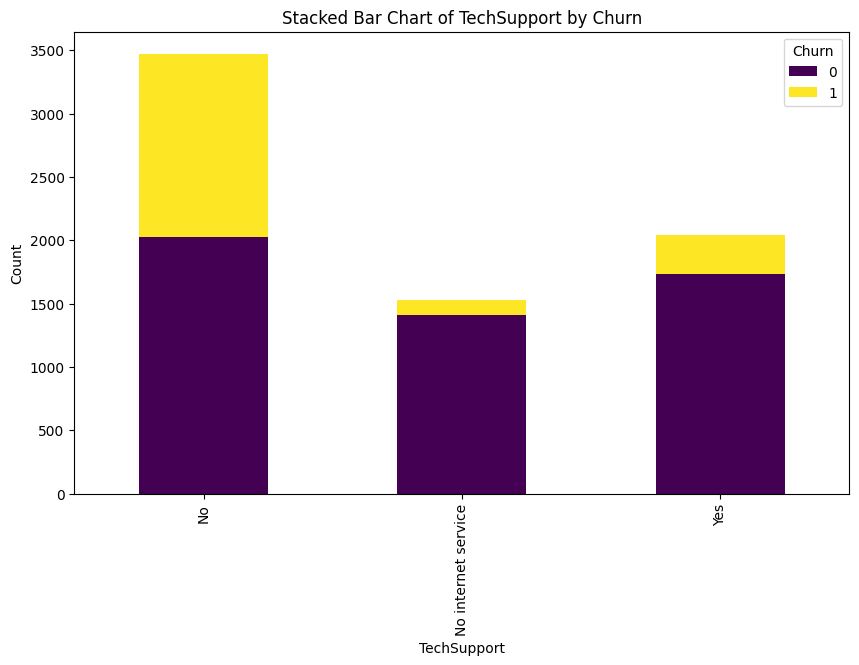

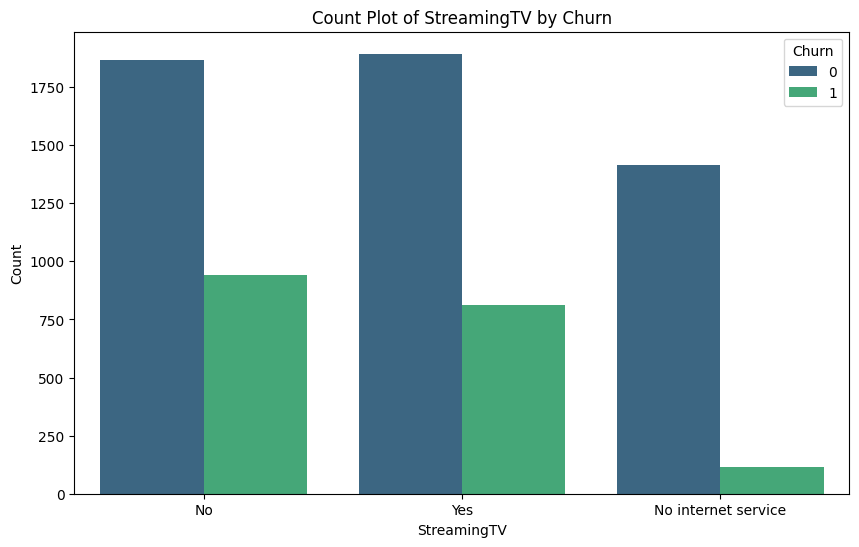

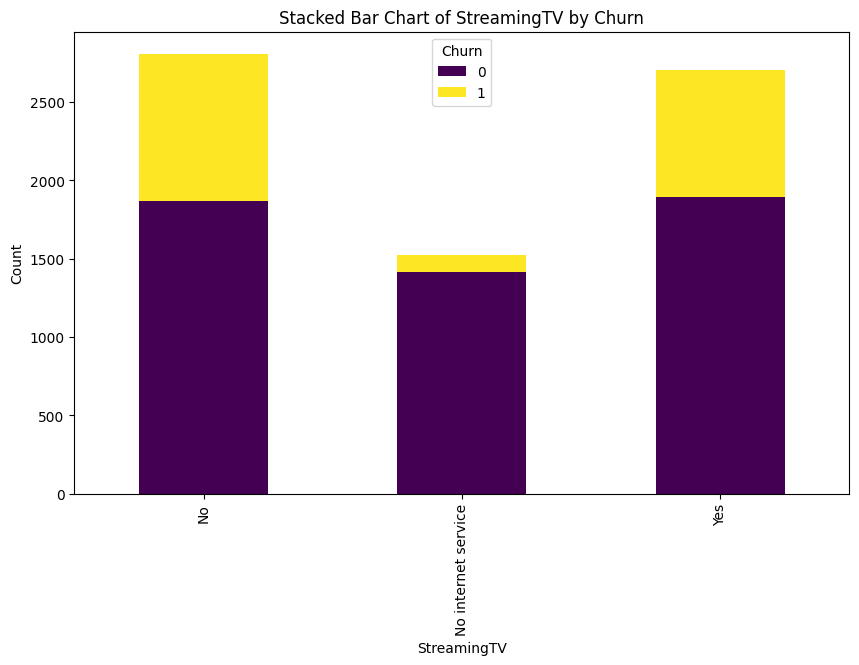

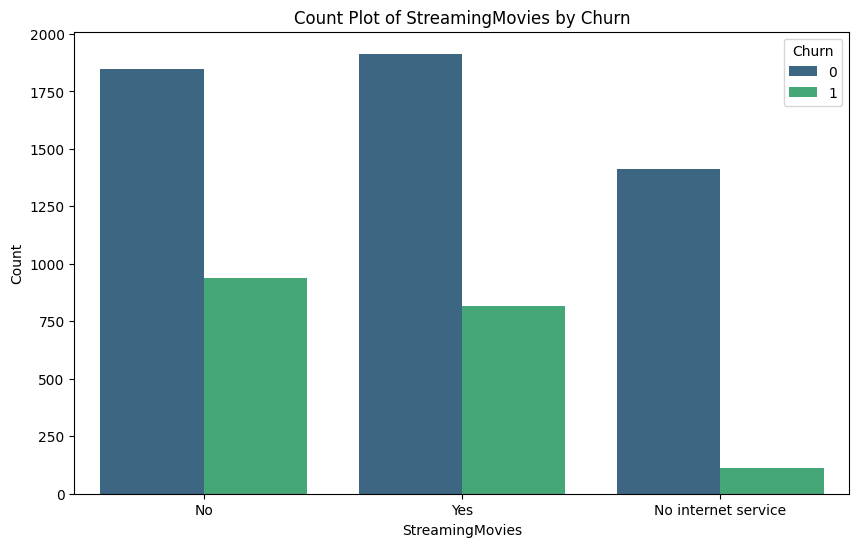

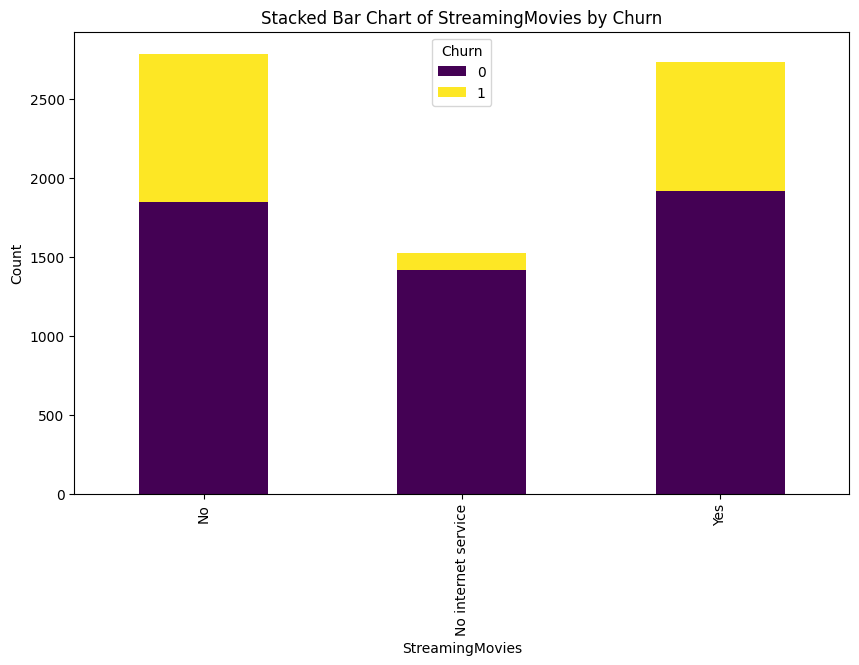

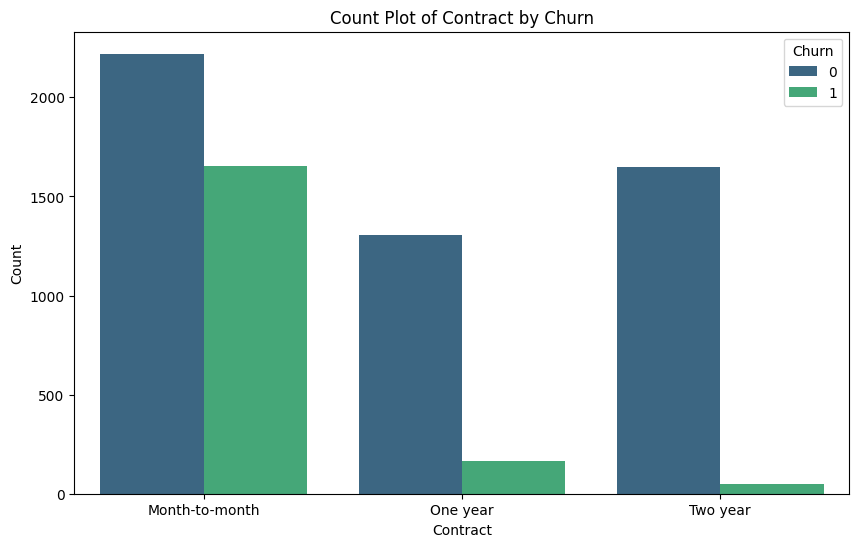

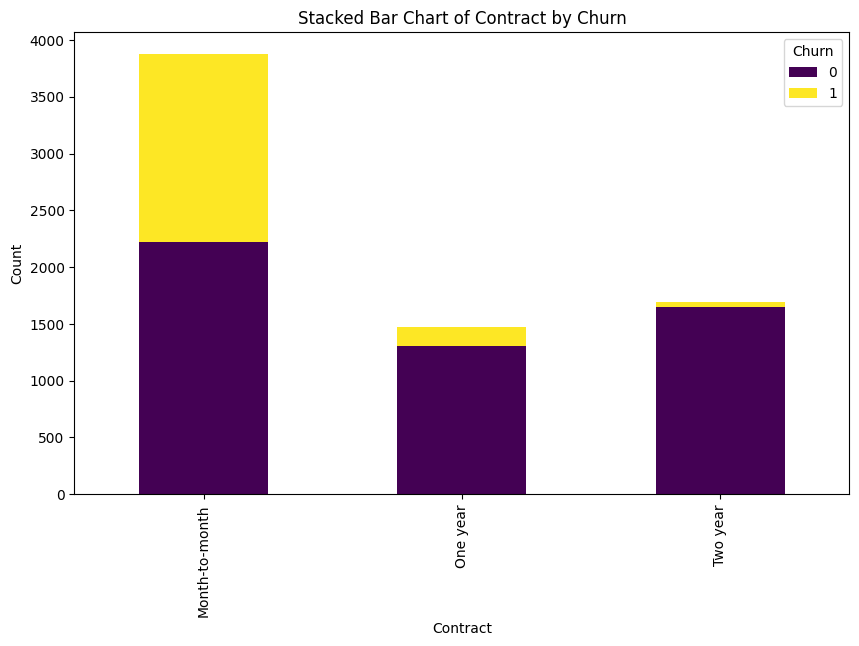

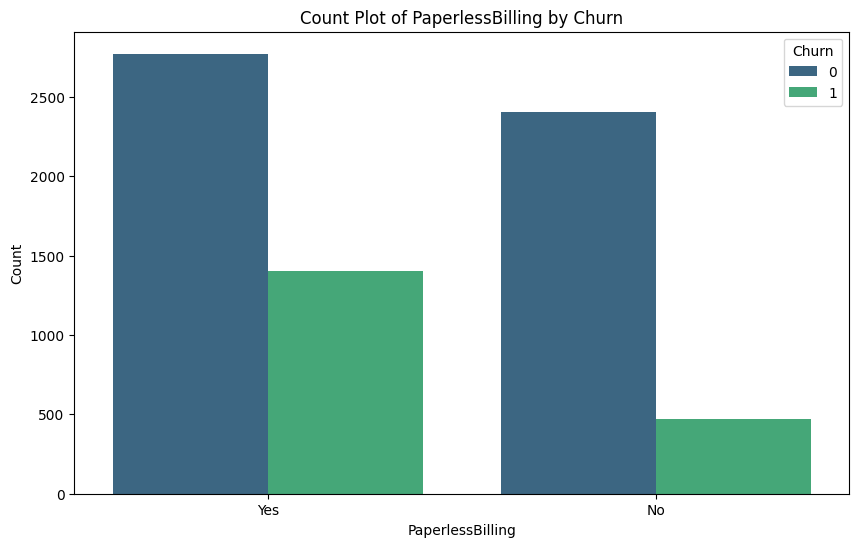

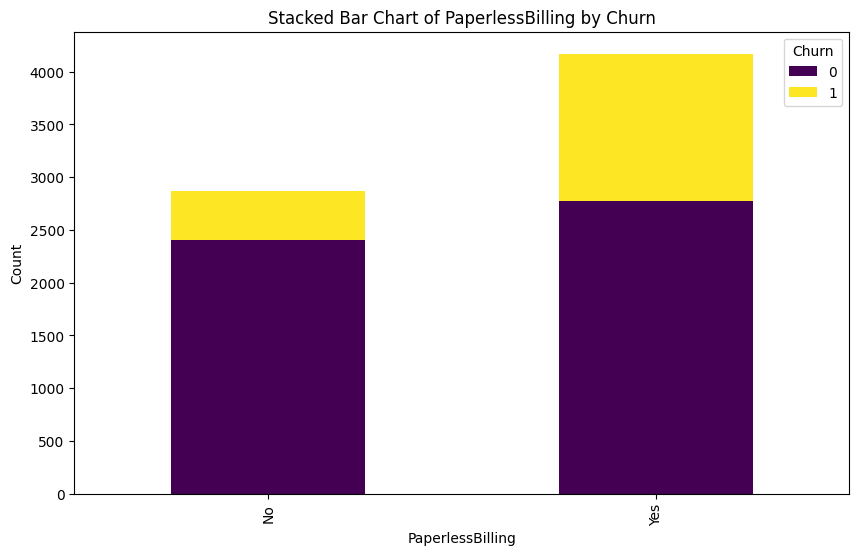

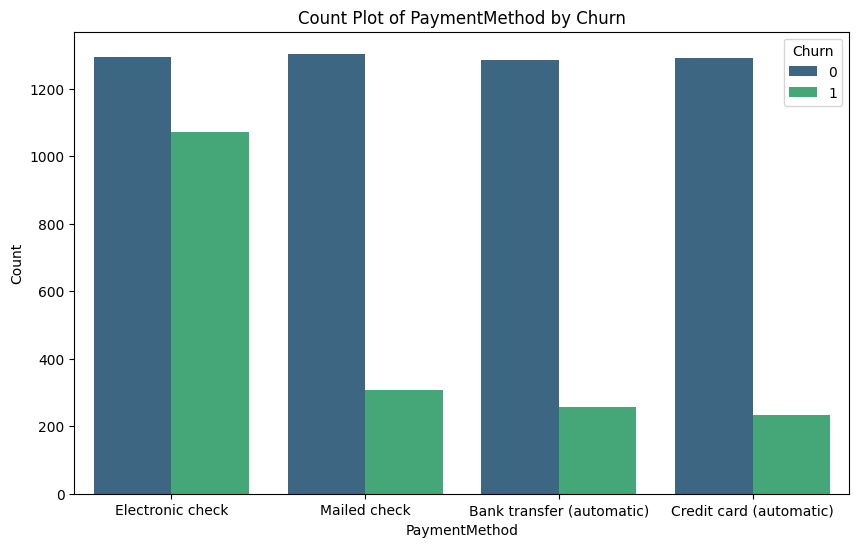

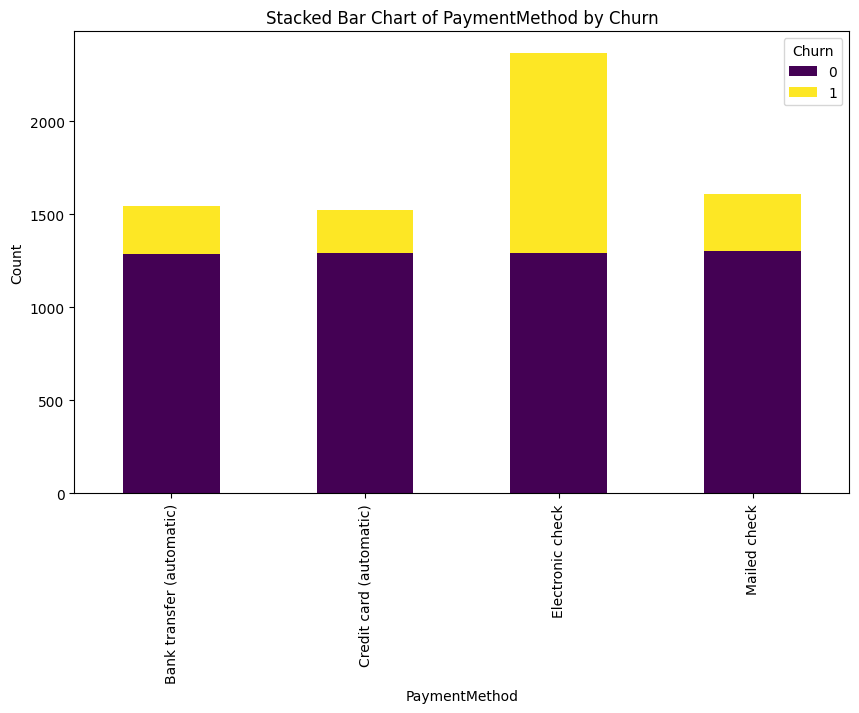

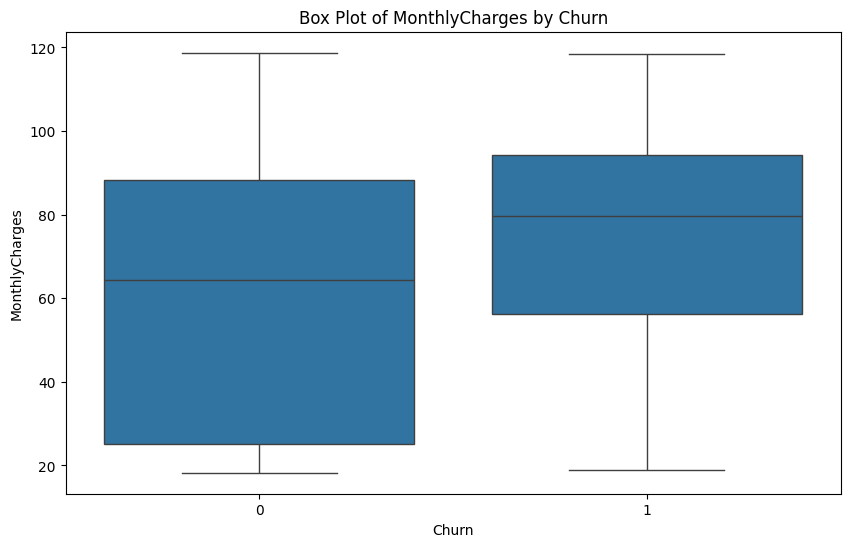

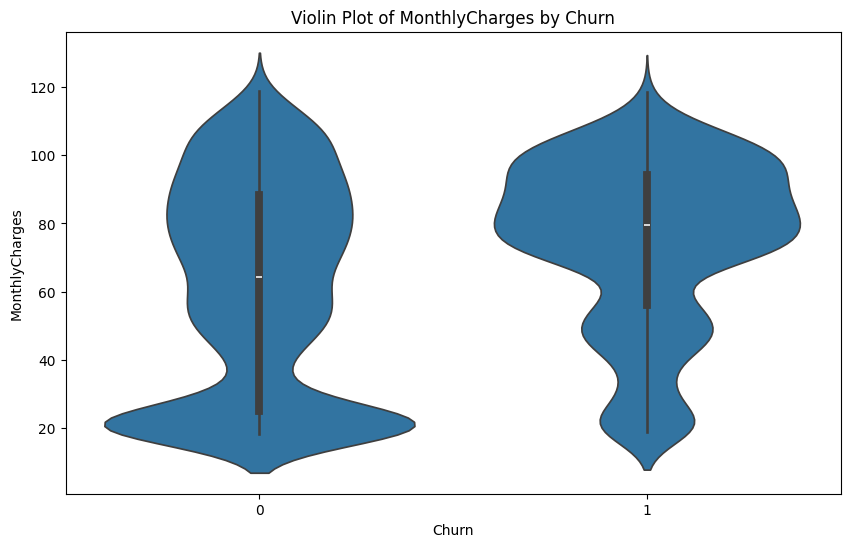

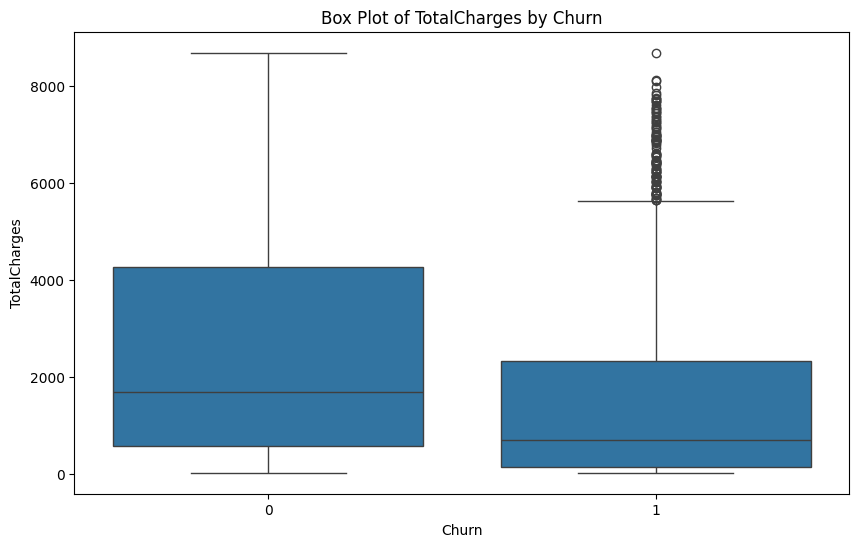

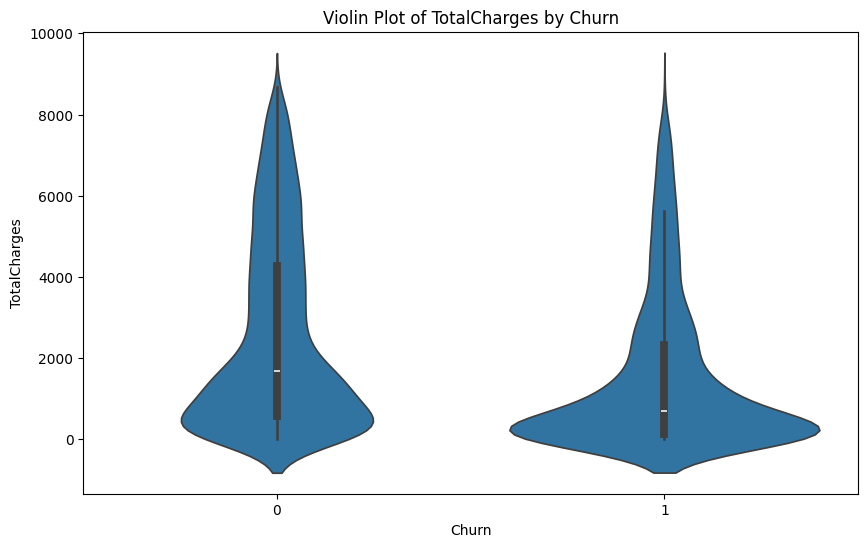

In [21]:
# Define the target variable
target = 'Churn'
for column in data.columns:
  unique_values = data[column].unique()
  length = len(unique_values)
  if column == target:
    continue
  if length > 4:
    plot_box_violin(data, column, target, plot_type='box')
    plot_box_violin(data, column, target, plot_type='violin')
  else:
    plot_count_stacked_bar(data, column, target)
    plot_stacked_bar_chart(data, column, target)

# Correlation Analysis

In [22]:
def map_unique_values(column):
    unique_values = column.unique()
    length = len(unique_values)
    if length <= 4:
        mapping = {val: i for i, val in enumerate(unique_values)}
        return column.map(mapping)
    return column

In [23]:
for column in data.columns:
  data[column] = map_unique_values(data[column])

data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2721,1,1,1,0,10,1,1,1,0,1,0,0,0,1,0,0,0,79.25,793.55,1
5156,1,0,1,0,17,1,1,0,1,0,0,0,0,0,1,1,1,56.10,946.95,0
1314,0,0,0,1,39,1,2,1,0,0,1,1,0,0,1,0,0,89.55,3474.45,1
5880,1,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,29.60,79.45,1
778,0,0,0,0,59,1,2,1,1,0,1,1,0,1,1,0,3,107.00,6152.30,0


In [24]:
# Create a copy of the DataFrame
df_int = data.copy()

# Apply the mapping function to each column
for column in df_int.columns:
    df_int[column] = map_unique_values(df_int[column])

In [25]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [26]:
# Compute the correlation matrix
correlation_matrix = df_int.corr()
correlation_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.000863,-0.003429,0.012230,0.005092,0.000985,0.001156,-0.000191,0.000126,0.011754,-0.005209,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.113791,-0.032310,-0.210897,-0.144828,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,-0.156530,-0.093704,0.220173,0.102652,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.117307,-0.000891,-0.081850,0.090753,-0.094451,-0.069072,-0.080127,-0.075779,-0.294806,-0.014877,-0.133115,-0.096848,-0.318364,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.019657,0.044590,0.190523,0.062775,0.156439,0.180832,0.140395,0.125820,0.243187,0.111377,0.123844,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.258958,-0.030359,0.145298,-0.253743,0.178649,0.144459,0.136145,0.140781,0.671607,-0.006152,0.340305,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,0.675070,0.387436,0.125353,0.129770,0.138755,0.123350,0.171538,0.165205,0.002247,-0.016505,-0.004070,0.247398,0.113013,0.011942
MultipleLines,-0.009451,0.113791,-0.117307,-0.019657,0.258958,0.675070,1.000000,0.186826,-0.066844,-0.130619,-0.013069,-0.066684,0.030195,0.028187,0.083343,-0.133255,0.025676,0.490700,0.412166,0.036310
InternetService,-0.000863,-0.032310,-0.000891,0.044590,-0.030359,0.387436,0.186826,1.000000,0.607788,0.650962,0.662957,0.609795,0.712890,0.709020,0.099721,0.138625,0.008124,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.066844,0.607788,1.000000,0.621739,0.749040,0.791225,0.701976,0.704984,0.389978,0.334003,0.213800,-0.621227,-0.153596,-0.332819
OnlineBackup,0.012230,-0.144828,0.090753,0.062775,-0.253743,0.129770,-0.130619,0.650962,0.621739,1.000000,0.601503,0.617003,0.604117,0.606863,0.035407,0.260715,0.003183,-0.710477,-0.537169,-0.074205


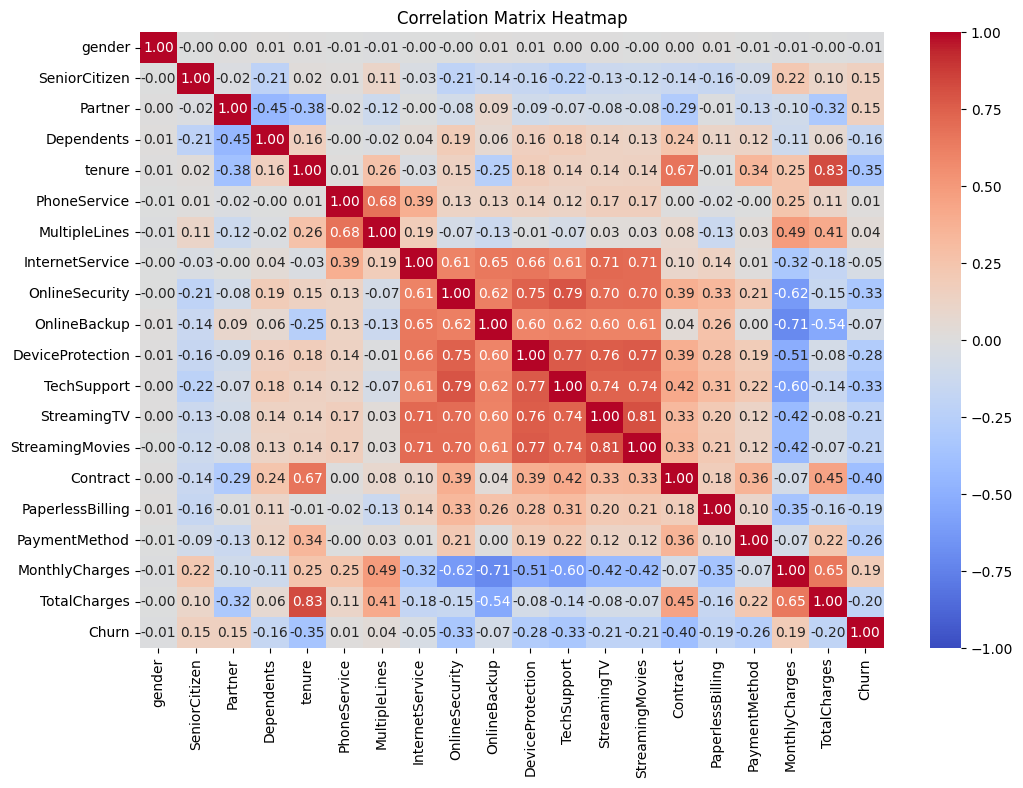

In [27]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Plot the heatmap
plot_correlation_heatmap(df_int)


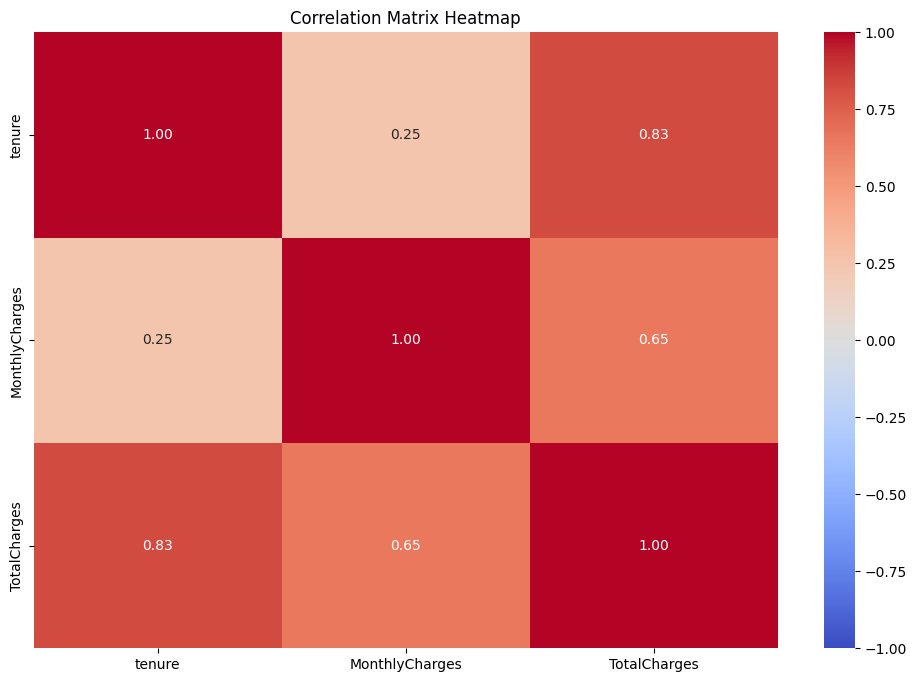

In [28]:
#Compute the correlation matrix to understand relationship betweek numerical features

#Create new dataframe with only numerical features
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges', ]
plot_correlation_heatmap(df_int[numerical])

# 7. Churn Prediction Modeling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [30]:
X = df_int.drop('Churn', axis=1)  # Features
y = df_int['Churn']  # Target variable

# Scale between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7],
         'model__weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=2)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

   # Append model name and performance metrics to the list
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3))
    print("Precision:", precision.round(3))
    print("Recall:", recall.round(3))
    print("F1 Score:", f1.round(3))
    print()


    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")

Model: Random Forest
Test Accuracy: 0.807
Precision: 0.797
Recall: 0.807
F1 Score: 0.798

Model: Gradient Boosting
Test Accuracy: 0.809
Precision: 0.799
Recall: 0.809
F1 Score: 0.8

Model: Support Vector Machine
Test Accuracy: 0.752
Precision: 0.804
Recall: 0.752
F1 Score: 0.764

Model: Logistic Regression
Test Accuracy: 0.752
Precision: 0.816
Recall: 0.752
F1 Score: 0.765

Model: K-Nearest Neighbors
Test Accuracy: 0.782
Precision: 0.78
Recall: 0.782
F1 Score: 0.781

Model: Decision Tree
Test Accuracy: 0.776
Precision: 0.77
Recall: 0.776
F1 Score: 0.772

Model: Ada Boost
Test Accuracy: 0.81
Precision: 0.803
Recall: 0.81
F1 Score: 0.805

Model: XG Boost
Test Accuracy: 0.803
Precision: 0.793
Recall: 0.803
F1 Score: 0.795

Model: Naive Bayes
Test Accuracy: 0.715
Precision: 0.806
Recall: 0.715
F1 Score: 0.731

Best Model:
Test Accuracy: 0.8097941802696949
Model Pipeline: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 AdaBoostClassifier(learning_rate=

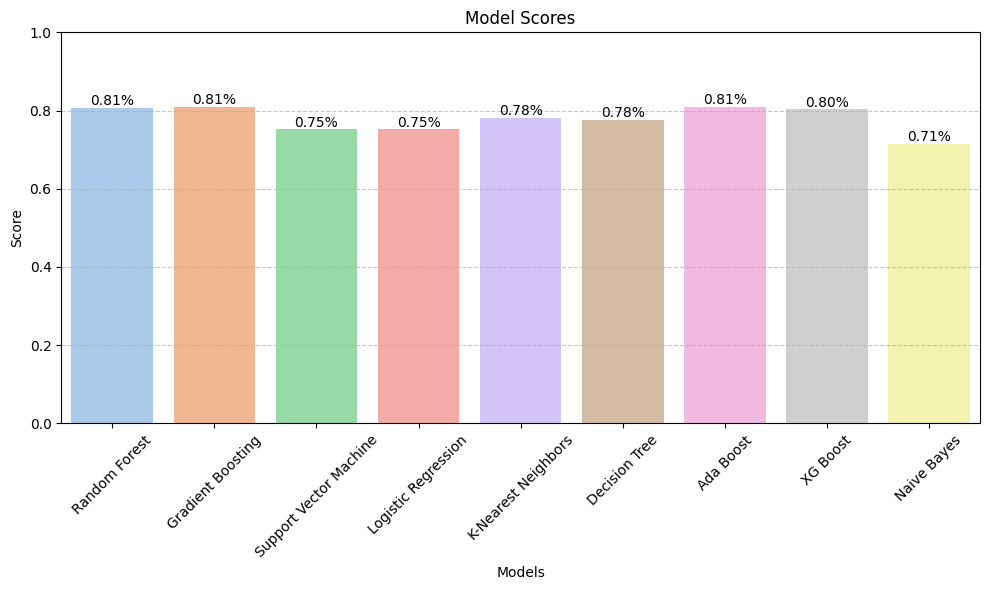

In [35]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint

# UpSampling
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
     {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6),
         'learning_rate': uniform(0.01, 0.2),
         'n_estimators': randint(100, 300),
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
     ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
     # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(Xr_train, yr_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(Xr_train, yr_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(Xr_train, yr_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(Xr_test)

    # Calculate performance metrics
    accuracy = accuracy_score(yr_test, y_pred)
    precision = precision_score(yr_test, y_pred, average='weighted')
    recall = recall_score(yr_test, y_pred, average='weighted')
    f1 = f1_score(yr_test, y_pred, average='weighted')

   # Append model name and performance metrics to the list
    model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy.round(3), "%")
    print("Precision:", precision.round(3))
    print("Recall:", recall.round(3))
    print("F1 Score:", f1.round(3))
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy.round(2), "%")



Model: Random Forest
Test Accuracy: 0.953 %
Precision: 0.953
Recall: 0.953
F1 Score: 0.953

Model: Gradient Boosting
Test Accuracy: 0.962 %
Precision: 0.962
Recall: 0.962
F1 Score: 0.962

Model: Support Vector Machine
Test Accuracy: 0.963 %
Precision: 0.965
Recall: 0.963
F1 Score: 0.963

Model: Logistic Regression
Test Accuracy: 0.921 %
Precision: 0.921
Recall: 0.921
F1 Score: 0.921

Model: K-Nearest Neighbors
Test Accuracy: 0.991 %
Precision: 0.991
Recall: 0.991
F1 Score: 0.991

Model: Decision Tree
Test Accuracy: 0.945 %
Precision: 0.945
Recall: 0.945
F1 Score: 0.945

Model: Ada Boost
Test Accuracy: 0.942 %
Precision: 0.942
Recall: 0.942
F1 Score: 0.942

Model: XG Boost
Test Accuracy: 0.961 %
Precision: 0.961
Recall: 0.961
F1 Score: 0.961

Model: Naive Bayes
Test Accuracy: 0.902 %
Precision: 0.902
Recall: 0.902
F1 Score: 0.902

Best Model:
Test Accuracy: 0.9905254091300603
Model Pipeline: KNeighborsClassifier(n_neighbors=3, weights='distance') with accuracy 0.99 %


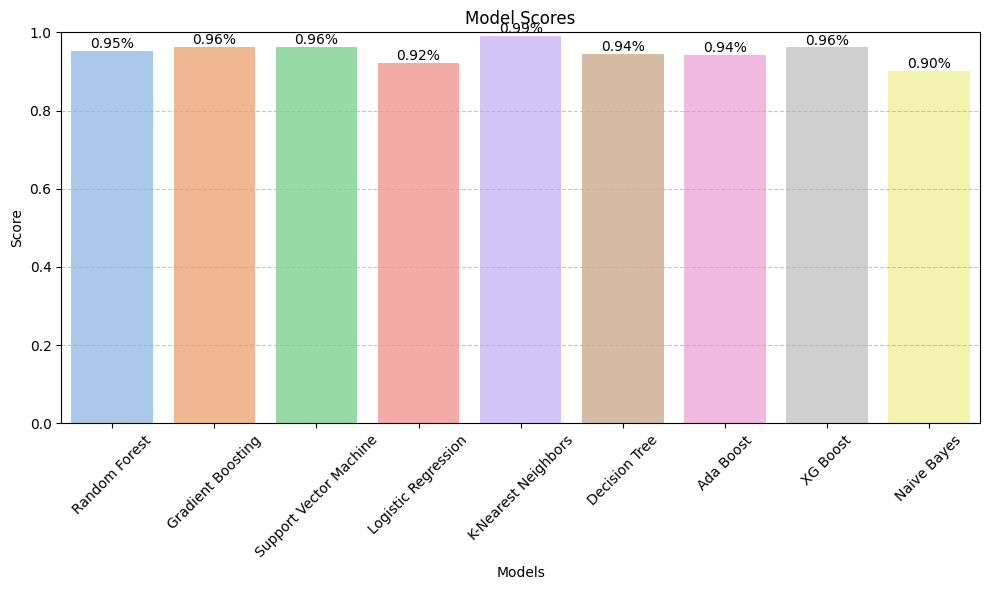

In [40]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

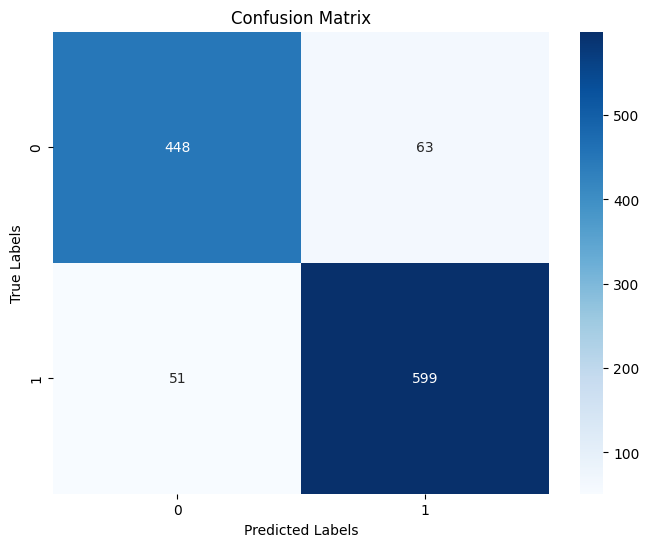

In [41]:
# Compute confusion matrix
conf_matrix = confusion_matrix(yr_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Exporting the DataFrame to an Excel file
df_int.to_excel('output.xlsx', index=False)